<a href="https://colab.research.google.com/github/Abhijeethvs/EDA-on-Global-Terrorism/blob/main/E_D_A_on_Global_Terrorism_dataset_by_Abhijeeth_VS_01_06_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Global Terrorism Exploratory Data Analysis (EDA)**

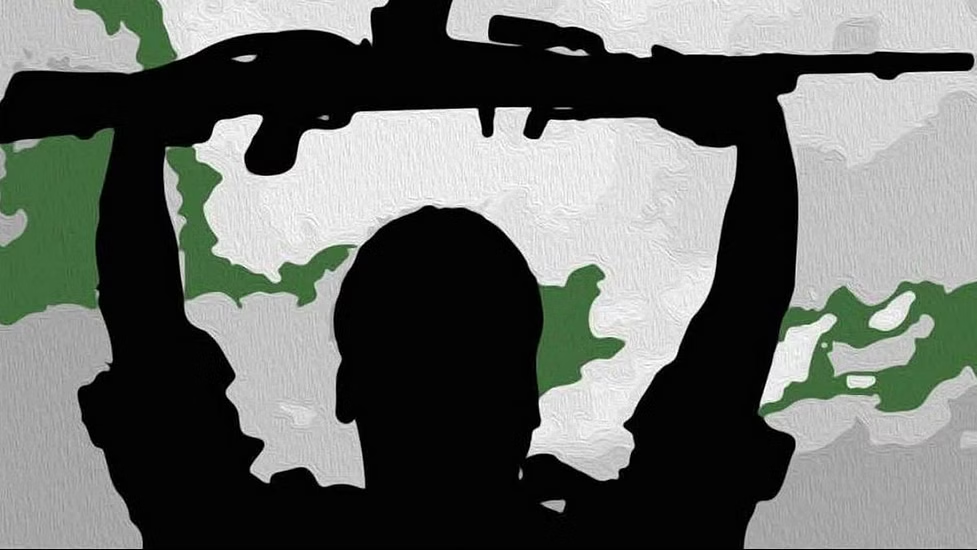

### **Project Description:**

The Global Terrorism Exploratory Data Analysis (EDA) project aims to analyze and explore a comprehensive dataset on global terrorism, with the objective of gaining insights into patterns, trends, and factors associated with terrorist activities worldwide. The project will be hosted on GitHub, providing a collaborative platform for researchers, data analysts, and enthusiasts to contribute, discuss, and enhance our understanding of this critical issue.

The primary goals of this project are:

**Dataset Exploration:** The project will involve thorough exploration of a rich dataset containing information on terrorist incidents, including date, location, attack type, target, casualties, and other relevant attributes. Exploratory data analysis techniques will be employed to identify meaningful patterns, correlations, and trends within the dataset.

**Visualizations:** Interactive and visually appealing data visualizations will be developed to present the findings of the analysis effectively. These visual representations will enable users to comprehend and interpret the complex data effortlessly, facilitating deeper insights into the patterns and dynamics of global terrorism.

**Temporal and Spatial Analysis:** The project will focus on analyzing the temporal and spatial aspects of global terrorism. Patterns in the frequency and intensity of attacks over time and across different regions will be examined to identify potential hotspots, trends, and shifts in terrorist activities.

**Collaborative Platform:** GitHub will serve as a collaborative platform for individuals passionate about combating terrorism. It will encourage discussions, sharing of ideas, and collaborative analysis, fostering a vibrant community of researchers, analysts, and experts working together to enhance our understanding of global terrorism.

**Github link** - https://github.com/Abhijeethvs/EDA-on-Global-Terrorism/tree/main

### **Importing project related python libraries -**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import math
from wordcloud import WordCloud

### **Importing the csv file and understanding basic DataSet specifications** -

In [49]:
#Mounting Google Drive -
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#Importing the csv file by pandas -
filepath = '/content/drive/MyDrive/Almabetter assignments/databases/Global_Terrorism_Data.csv' 
gt_df = pd.read_csv(filepath, low_memory = False)
gt_df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [51]:
#Shape of the dataset - 
gt_df.shape

(181691, 135)

In [52]:
gt_df.describe().transpose()

count          mean           std           min           25%  \
eventid    181691.0  2.002704e+11  1.325955e+09  1.970000e+11  1.991020e+11   
iyear      181691.0  2.002639e+03  1.325943e+01  1.970000e+03  1.991000e+03   
imonth     181691.0  6.467277e+00  3.388303e+00  0.000000e+00  4.000000e+00   
iday       181691.0  1.550564e+01  8.814045e+00  0.000000e+00  8.000000e+00   
extended   181691.0  4.534622e-02  2.080629e-01  0.000000e+00  0.000000e+00   
...             ...           ...           ...           ...           ...   
nreleased   10400.0 -2.901827e+01  6.572012e+01 -9.900000e+01 -9.900000e+01   
INT_LOG    181691.0 -4.543731e+00  4.543547e+00 -9.000000e+00 -9.000000e+00   
INT_IDEO   181691.0 -4.464398e+00  4.637152e+00 -9.000000e+00 -9.000000e+00   
INT_MISC   181691.0  9.000996e-02  5.684573e-01 -9.000000e+00  0.000000e+00   
INT_ANY    181691.0 -3.945952e+00  4.691325e+00 -9.000000e+00 -9.000000e+00   

                    50%           75%           max  
eventid    2.009020e+11  2.014080e+11  2.017120e+11  
iyear      2.009000e+03  2.014000e+03  2.017000e+03  
imonth     6.000000e+00  9.000000e+00  1.200000e+01  
iday       1.500000e+01  2.300000e+01  3.100000e+01  
extended   0.000000e+00  0.000000e+00  1.000000e+00  
...                 ...           ...           ...  
nreleased  0.000000e+00  1.000000e+00  2.769000e+03  
INT_LOG   -9.000000e+00  0.000000e+00  1.000000e+00  
INT_IDEO  -9.000000e+00  0.000000e+00  1.000000e+00  
INT_MISC   0.000000e+00  0.000000e+00  1.000000e+00  
INT_ANY    0.000000e+00  0.000000e+00  1.000000e+00  

[77 rows x 8 columns]

### **Checking Dataset for Missing values** - 

In [ ]:
#Finding the percentage of missing values columns wise - 

missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df)
missingvalues_percentage

### **Performing Data Cleaning operations to eliminate columns with more than 15% Nan Values** - 

In [54]:
# Finding the columns that have more than 15% missing values
drop_columns_list = list(missingvalues_percentage[missingvalues_percentage>0.15].index.values)

In [ ]:
# Dropping the Missing value columns from the data set
gt_df.drop(drop_columns_list,inplace=True,axis=1)
gt_df.columns

In [56]:
gt_df.shape

(181691, 47)

In [ ]:
# Exploring the remaining columns data for missing values
missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df) #To get the percentage of null values each column wise
missingvalues_percentage*100

In [ ]:
gt_df.info()

### **Renaming columns for ease of data analysis** - 

In [59]:
gt_df.rename(columns={
                      'iyear':'Year','imonth':'Month','country_txt':'Country',
                      'region_txt':'Region','provstate':'State','city':'City',
                      'latitude':'latitude','longitude':'longitude','success':'Success',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Target_type',
                      'targsubtype1_txt':'Target_subtype','gname':'Group_name',
                      'weaptype1_txt':'Weapontype','nkill':'Kills', 'nwound':'Wounds'
                      },inplace=True)
gt_df.columns

Index(['eventid', 'Year', 'Month', 'iday', 'extended', 'country', 'Country',
       'region', 'Region', 'State', 'City', 'latitude', 'longitude',
       'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'Success', 'suicide', 'attacktype1', 'Attacktype',
       'targtype1', 'Target_type', 'targsubtype1', 'Target_subtype', 'target1',
       'natlty1', 'natlty1_txt', 'Group_name', 'guncertain1', 'individual',
       'weaptype1', 'Weapontype', 'weapsubtype1', 'weapsubtype1_txt', 'Kills',
       'Wounds', 'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

### **Filling NaN Values respectively using Pandas fillna method call** - 

In [60]:
gt_df['State']= gt_df['State'].fillna('Unknown')
gt_df['City']=gt_df['City'].fillna('Unknown')
gt_df['Target_type']= gt_df['Target_type'].fillna("Others")
gt_df['Kills']=gt_df['Kills'].fillna(0)
gt_df['Wounds']=gt_df['Wounds'].fillna(0)
gt_df['victims']=gt_df['Kills']+gt_df['Wounds']

## **1.General Analysis of DataSet**- 

### **1.1 Project description**

In [61]:
print("Country with most attacks: ",gt_df["Country"].value_counts().idxmax())
print("City with most attacks: ",gt_df["City"].value_counts().index[1])
print("Region with most attacks: ",gt_df["Region"].value_counts().idxmax())
print("Year with most attacks: ",gt_df["Year"].value_counts().idxmax())
print("Month with most attacks: ",gt_df["Month"].value_counts().idxmax())
print("Group with most attacks: ",gt_df["Group_name"].value_counts().index[1])
print("Most Attack Types: ",gt_df["Attacktype"].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with most attacks:  Middle East & North Africa
Year with most attacks:  2014
Month with most attacks:  5
Group with most attacks:  Taliban
Most Attack Types:  Bombing/Explosion


### **1.2 Analysis of countries most affected by terrorist attacks in the world from 1970 - 2017**

In [62]:
# Code - 
grp = gt_df.groupby('Country')
tot_ser = grp['Success'].sum()
tot_attack = pd.DataFrame(tot_ser).reset_index()
tot_attack.sort_values(by = 'Success',ascending = False, inplace = True)
tot_attack = tot_attack.head(30)

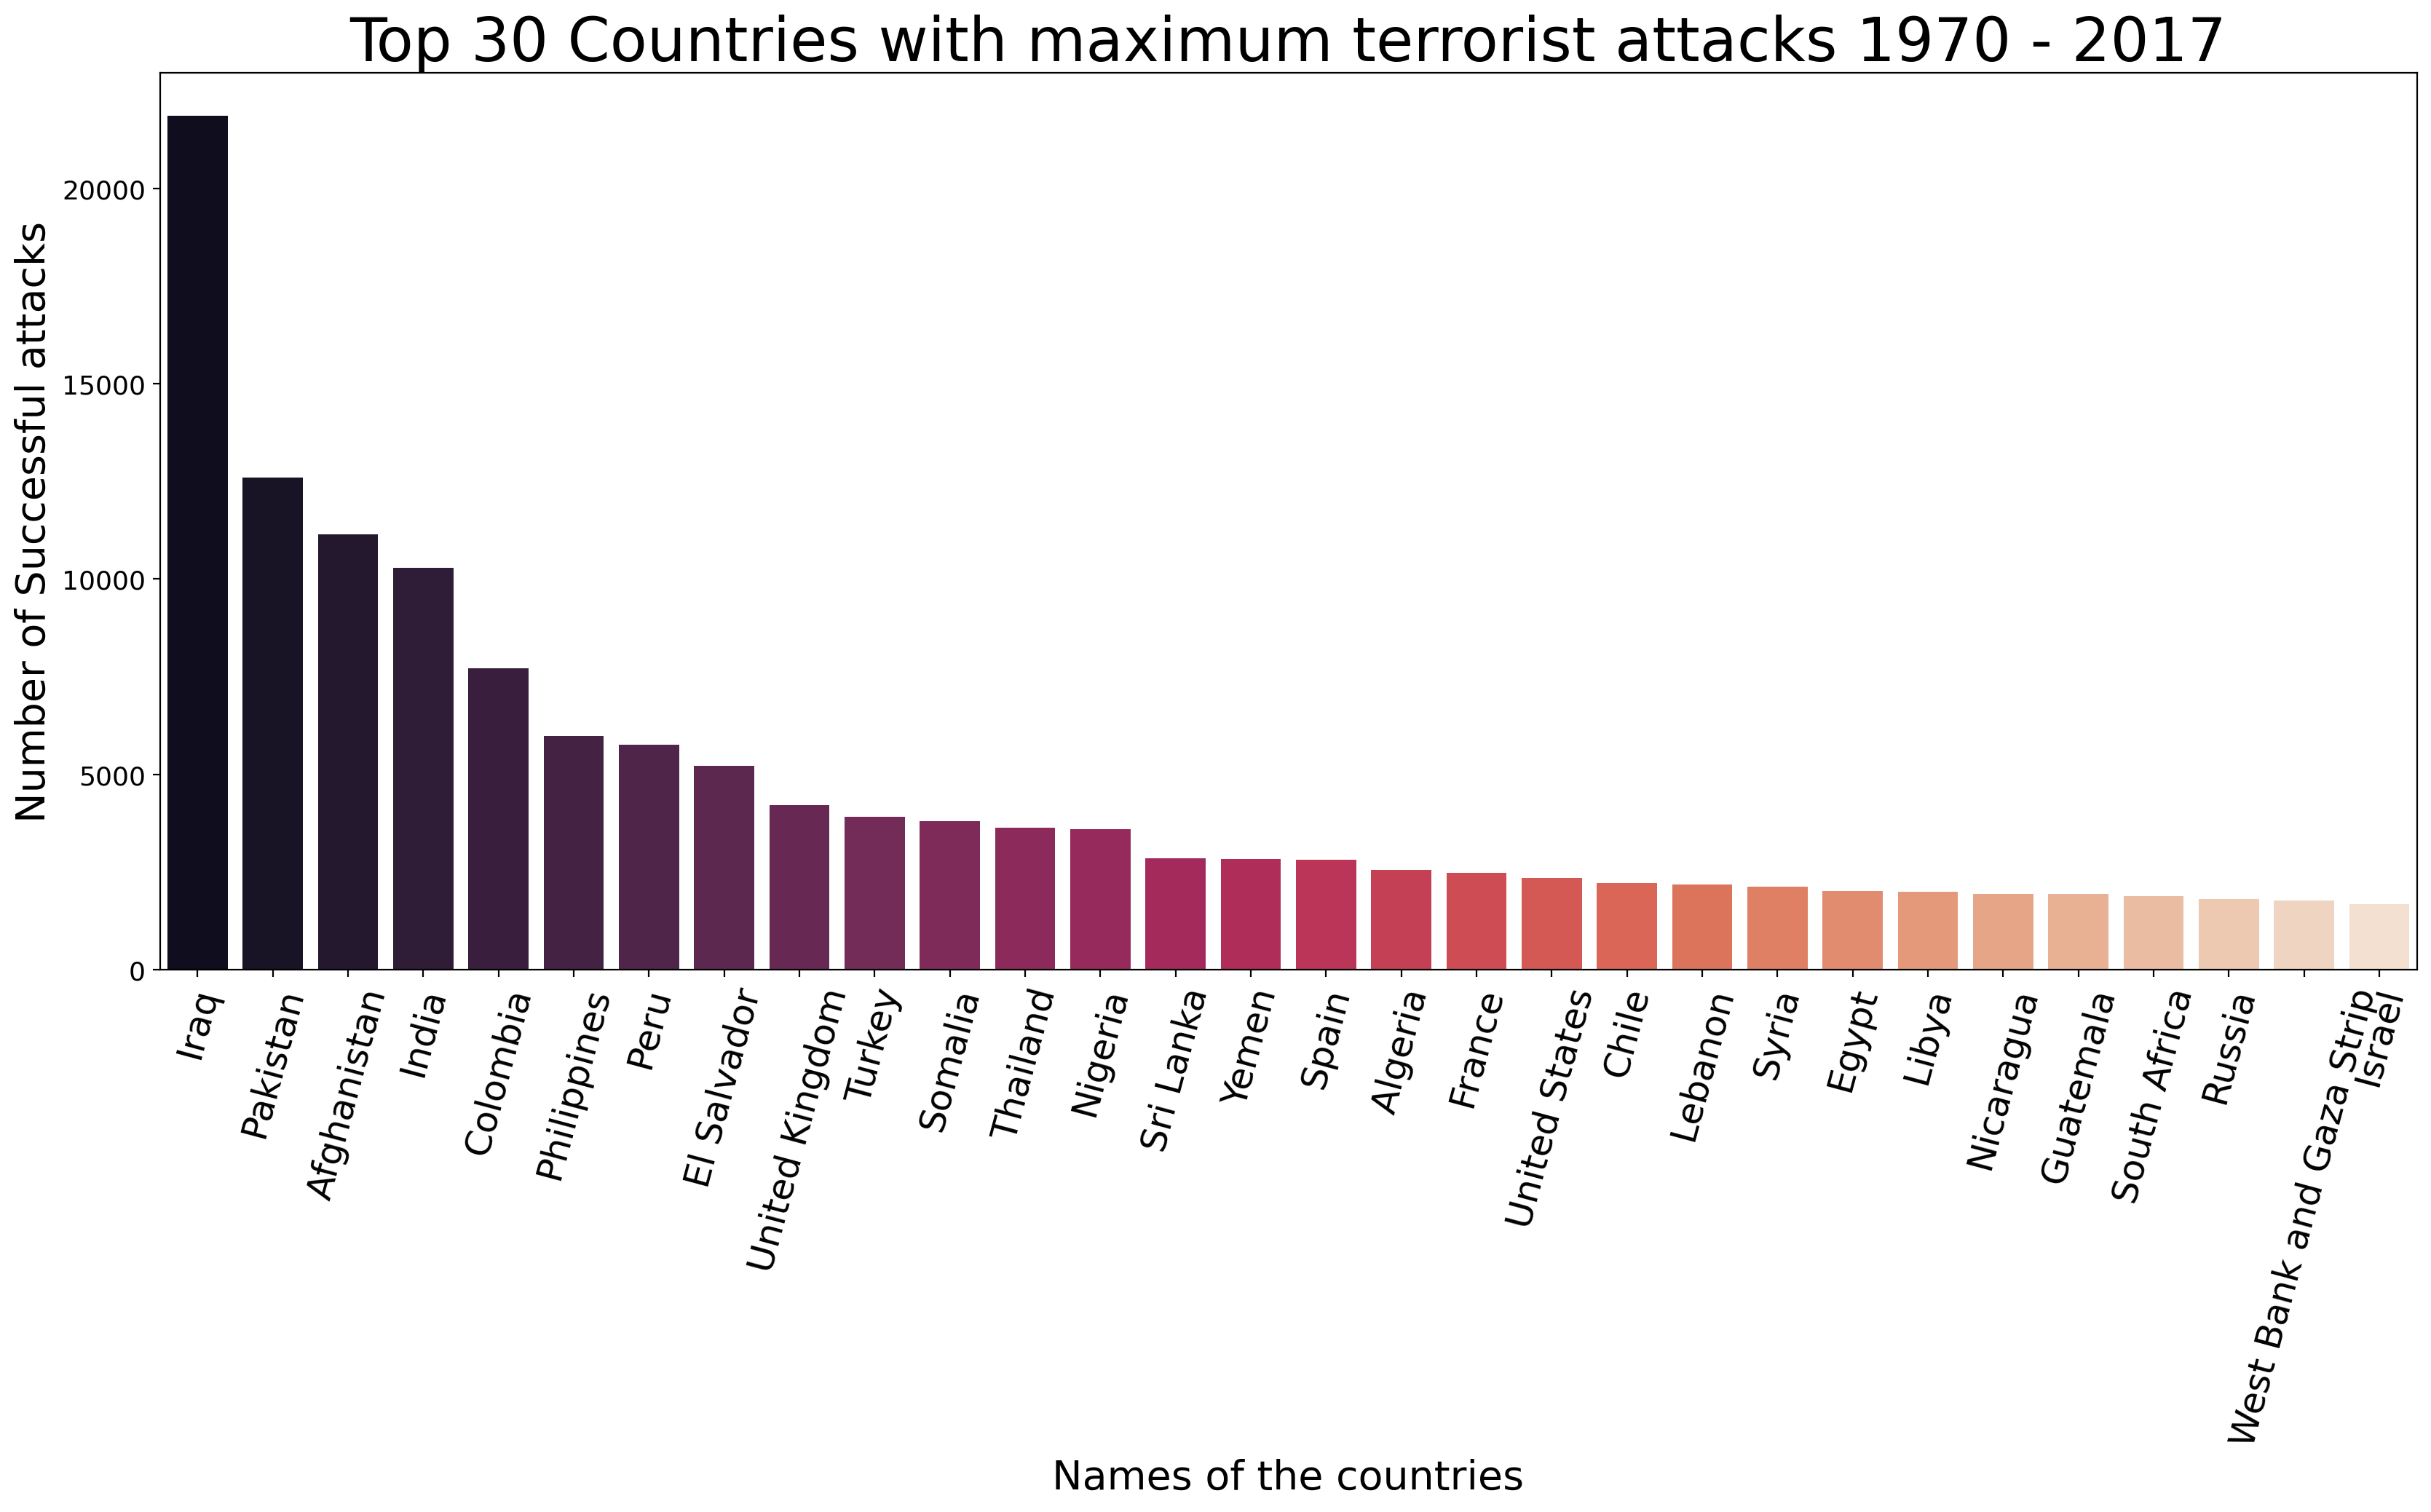

In [152]:
# Visual - 
plt.figure(figsize = (20,8),dpi = 200)

a = sns.barplot(data = tot_attack, x = 'Country', y = 'Success', palette = 'rocket')

plt.xticks(rotation=75)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=13)

a.set_title('Top 30 Countries with maximum terrorist attacks 1970 - 2017', fontsize = 30)
a.set_ylabel('Number of Successful attacks', fontsize = 20)
a.set_xlabel('Names of the countries', fontsize = 20)
plt.show()

In [159]:
count4 = tot_attack.head(6).reset_index().drop('index', axis = 1)
count4

Country  Success
0         Iraq    21861
1     Pakistan    12600
2  Afghanistan    11141
3        India    10280
4     Colombia     7712
5  Philippines     5975

### **Visualisation insight** - 
The statistics of the Bar plot provides us with a quick and easy representation of the overall Terrorist attacks carried out by all Terror outfits combined during the time period from **1970 to 2017**. 

Based on the plot above some of the statistics that can be determined include -

1. **Iraq** with 21861 attacks, **Pakistan** with 12600 attacks & **Afghanistan** with 11141 attacks respectively, are the top three contries affected by most number of terrorist attacks globally.

2. **India** closely follows with 10280 attacks at the fourth spot for the most number of terrorist attacks globally.

Based on the above outline insight we can understand the magnitude of attacks worldwide, and provide a more detailed Exploratory Data Analysis on the countries that are a hotspot for Terror activities.

## **2. TERROR TREND ANALYSIS** -

### **2.1 Overall terror trend lineplot** - 

In [64]:
#Code - 

year_grp = gt_df.groupby('Year')
count_year = pd.DataFrame(year_grp['Success'].sum()).reset_index()
failed = gt_df[gt_df['Success'] == 0]
failed_df = pd.DataFrame(failed['Year'].value_counts().reset_index())
failed_df.columns = ['Year','Failures']
failed_df.sort_values(by = 'Year', ascending = True, inplace = True)

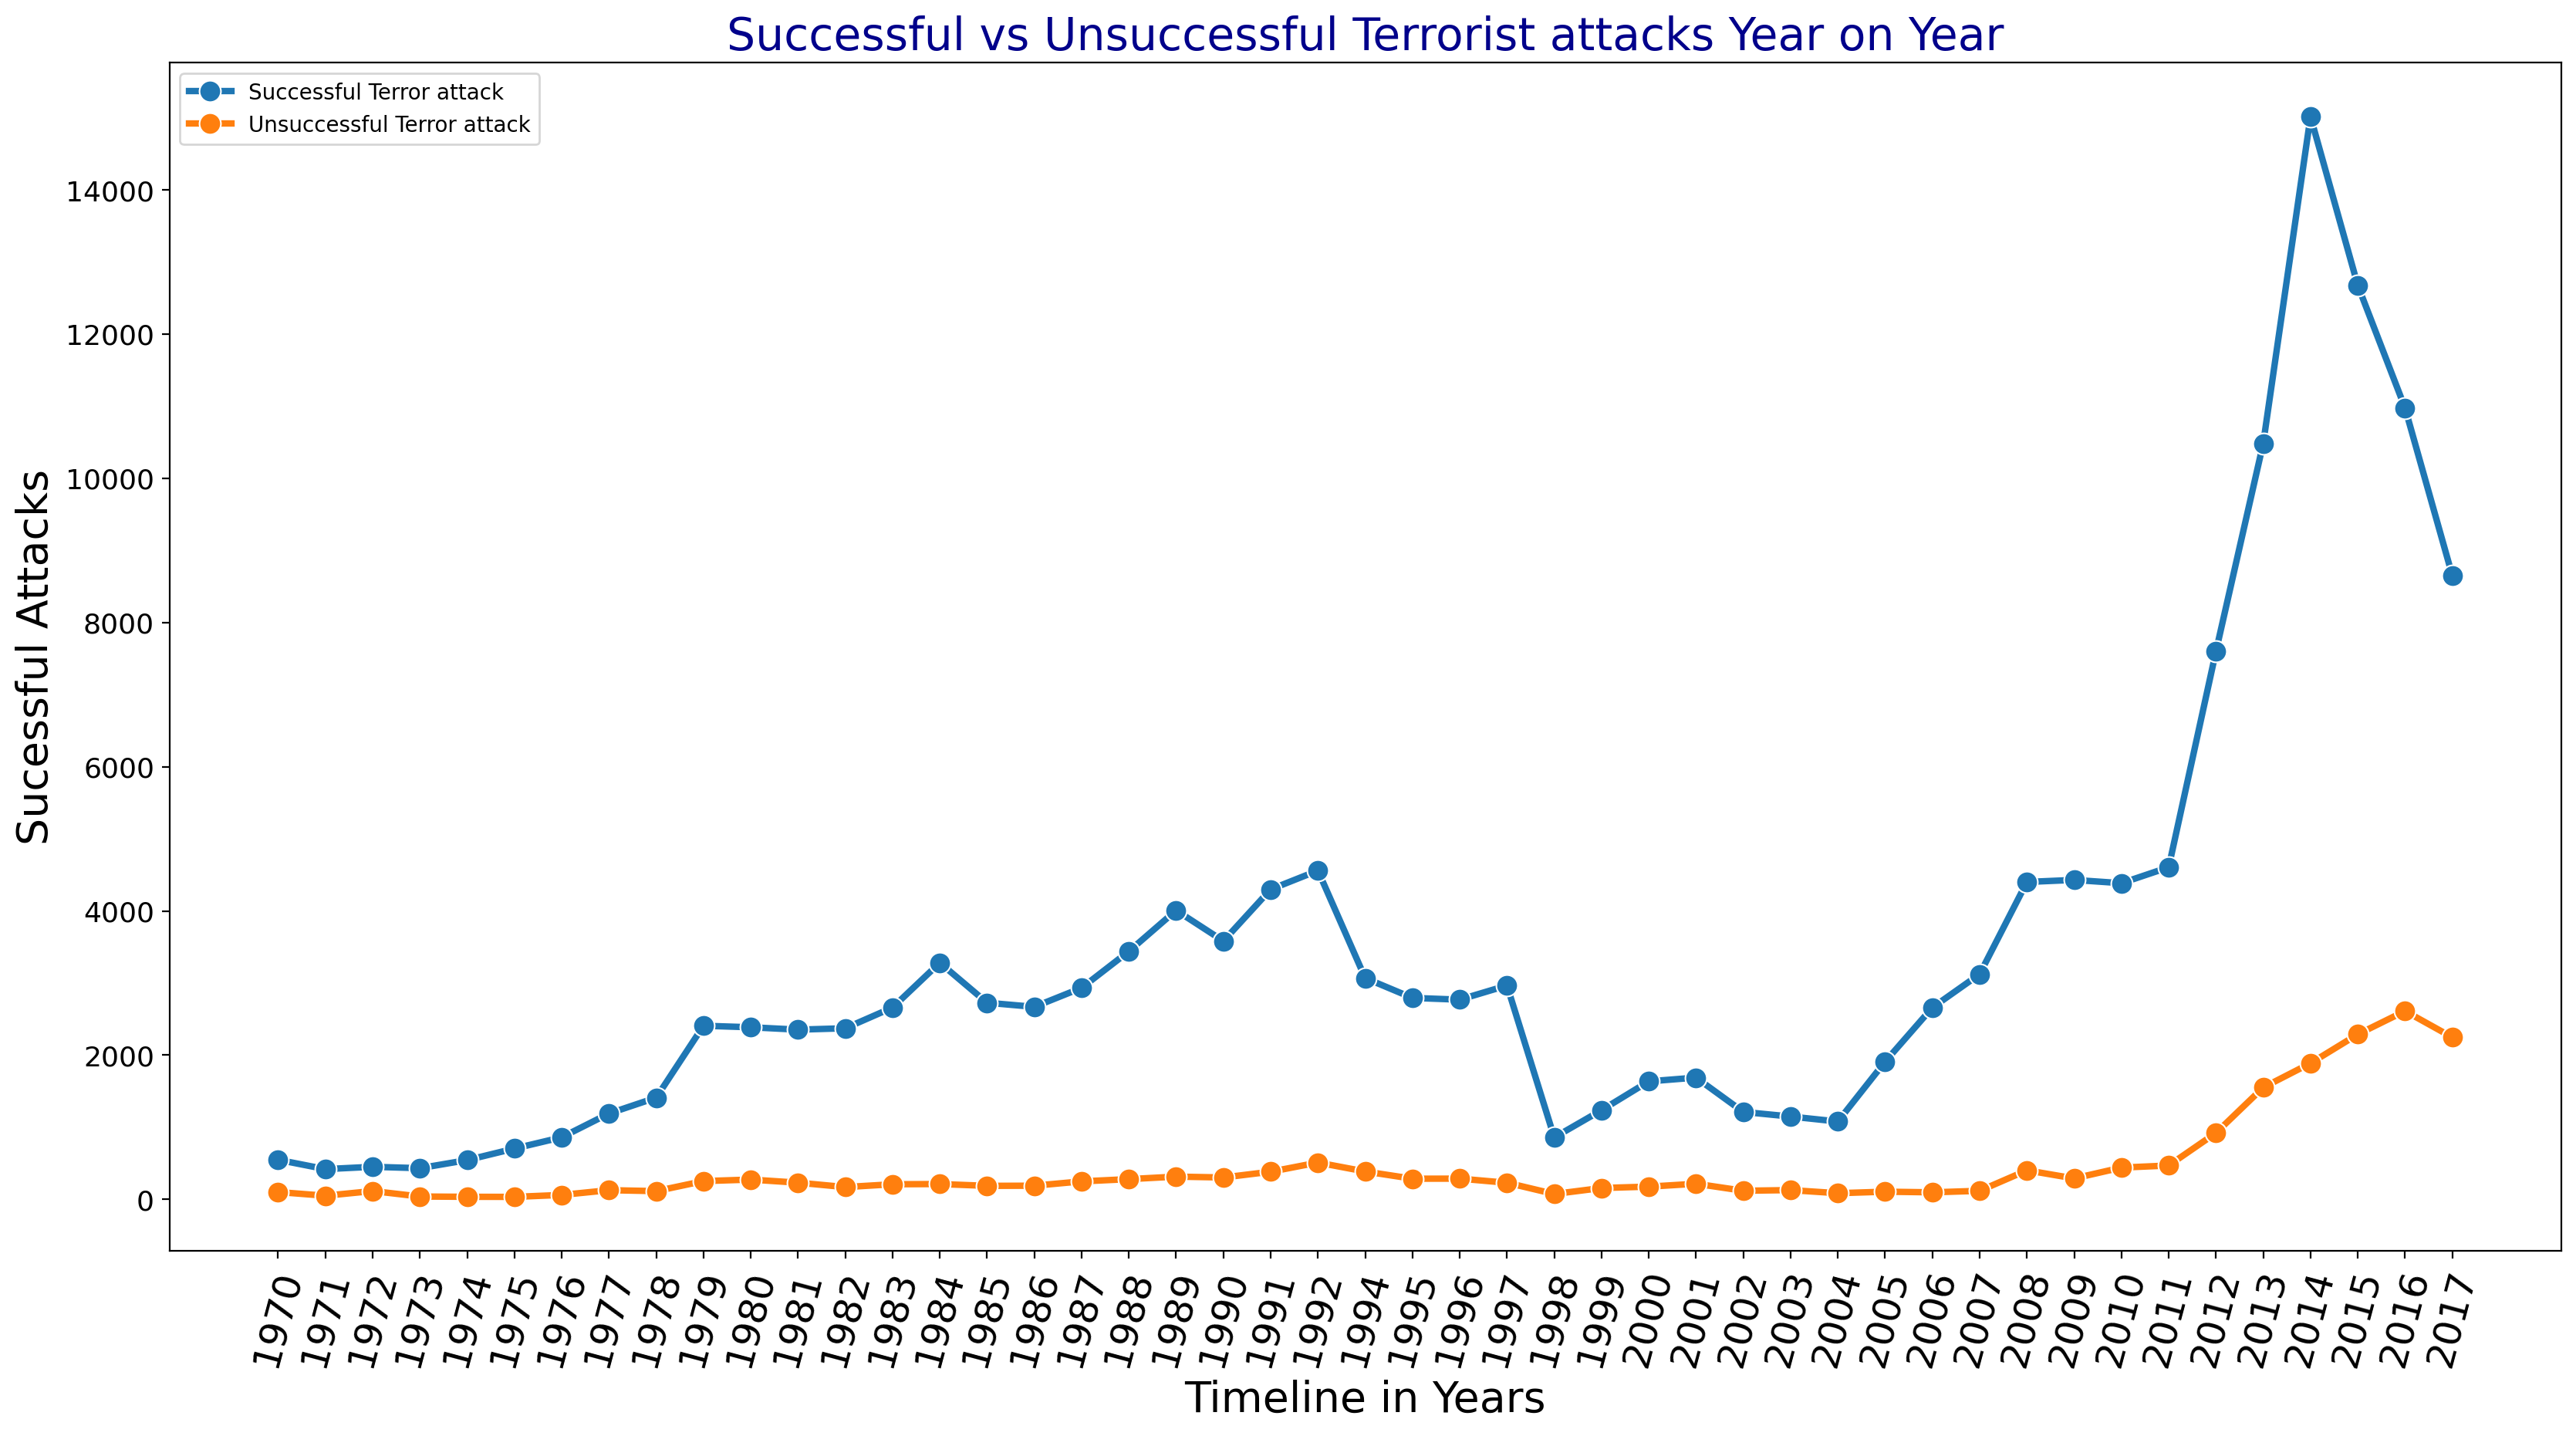

In [65]:
# Visual - 

# Line plot representing the Year Vs no of Attacks Regional wise
plt.figure(figsize = (20,10),dpi = 200)
sns.lineplot(data = count_year, x = count_year['Year'].astype(str),
             y = count_year['Success'], linewidth = 3,label = 'Successful Terror attack', 
             marker = 'o',markersize = 10)
sns.lineplot(data = failed_df , x = failed_df['Year'].astype(str), y = failed_df['Failures'],
             linewidth = 3, label = 'Unsuccessful Terror attack', marker = 'o',markersize = 10)
plt.ylabel('Sucessful Attacks',fontsize= 20)
plt.xlabel("Timeline in Years",fontsize= 20)
plt.xticks(rotation = 75)
plt.yticks(fontsize = 13)
plt.title("Successful vs Unsuccessful Terrorist attacks Year on Year",fontsize=21,color='Darkblue')

plt.show()

### **Visualisation insight** - 

The above plot indicates a more detailed apprach with a lineplot that indicates the progression of time along the 'X' axis and signifies the count of number of attacks along the 'Y' axis.

The blue plot line indicates number of successful attacks and the orange line indicates the number of unsuccessful attacks.

The following inference can be obtained from the above plot - 
1. From the plot above it can be understood there were two significant time periods where a tremendous **increase/spike** in terrorist attacks which were recorded, they were in the years **1992 and 2014**.

2. The least terrorist attacks were observed in the years **1973, 1998 and 2004**.

3. The highest number of unsuccessful attacks were recorded in the year **2016** with about 2300 attacks, However this information does not indicate an increase in success ratio of any intelligence/military agencies.  

### 2.2 Terror Analysis for the year 1992 - 

In [66]:
#Code - 
df_1992 = pd.DataFrame(year_grp.get_group(1992)[['Region','Group_name']].value_counts().reset_index())
df_1992.columns = ['Region','Group_name','Number of attacks']
top10_1992 = df_1992.sort_values(by = 'Number of attacks', ascending = False).head(10)
top10_1992_bar = pd.DataFrame(top10_1992.groupby('Region')['Number of attacks'].sum()).reset_index()

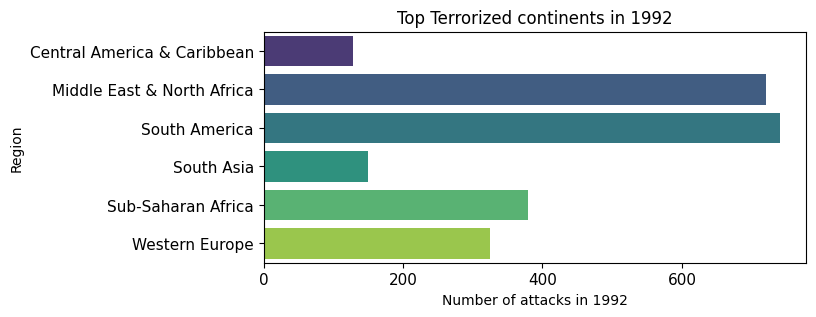

In [150]:
#Visual - 
#SunBurst plot Code - 
figA = px.sunburst(top10_1992,values='Number of attacks',
                   path=['Region','Group_name','Number of attacks'],
                   color_discrete_sequence=px.colors.qualitative.Dark24_r,
                   title='Top Continents affected by terrorist attacks in 1992')
figA.show()

#Barplot Code - 
plt.figure(figsize = (7,3))
sns.barplot(data = top10_1992_bar, x = 'Number of attacks', y = 'Region',palette = 'viridis')
plt.xlabel('Number of attacks in 1992')
plt.title('Top Terrorized continents in 1992')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

#### From the above Sunburst plot and Bar plot it is evident that the top countries affected by terrorist attacks in the year 1992 are -

#### 1.South America - 741 attacks
#### 2.Middle East and North Africa - 721 attacks
#### 3.Sub-Saharan Africa - 379 attacks

### 2.2 Terror Analysis for the year 2014 -

In [68]:
#Code - 
df_2014 = pd.DataFrame(year_grp.get_group(2014)[['Region','Group_name']].value_counts().reset_index())
df_2014.columns = ['Region','Group_name','Number of attacks']
top10_2014 = df_2014.sort_values(by = 'Number of attacks', ascending = False).head(10)
top10_2014_bar = pd.DataFrame(top10_2014.groupby('Region')['Number of attacks'].sum()).reset_index()

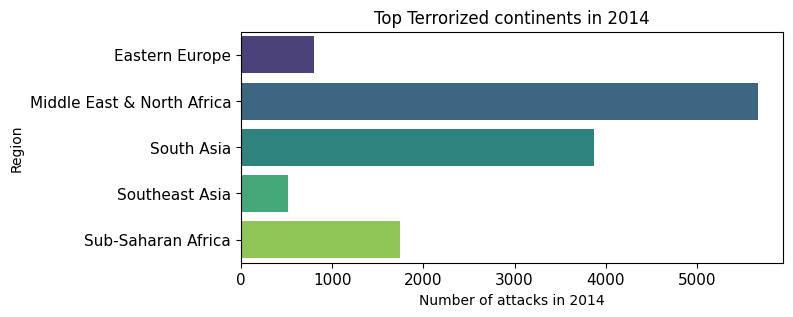

In [69]:
#Visual -
#Sunburst plot Code-

figB = px.sunburst(top10_2014,values='Number of attacks',
                       path=['Region','Group_name','Number of attacks'],
                       color_discrete_sequence=px.colors.qualitative.Prism,
                       title='Top Continents affected by terrorist attacks in 2014')
figB.show()



#Barplot Code-
plt.figure(figsize = (7,3))
sns.barplot(data = top10_2014_bar, x = 'Number of attacks', y = 'Region',palette = 'viridis')
plt.xlabel('Number of attacks in 2014')
plt.title('Top Terrorized continents in 2014')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.show()

From the above sunburst plot and barplot it is evident that the top countries affected by terrorist attacks in the year 2014 are -

1. Middle East and North Africa - **5664 attacks**
2. South Asia - **3866 attacks**
3. Sub-Saharan Africa - **1748 attacks**

The insights which can be arrived at by the observations of the spike in 1992 and the spike in 2014 are - 
1. With the advancement of technology and civilization there is a positive correlation in the rise of terrorist activities observed.
2. Middle East and North Africa remains as the hub for terror activities in both the spikes observed.
3. Number of terrorist attacks have increased in the South Asian region in the year 2014 in comparison to the observations recorded in the 1992 spike. 

### 2.3 Wordcloud - 

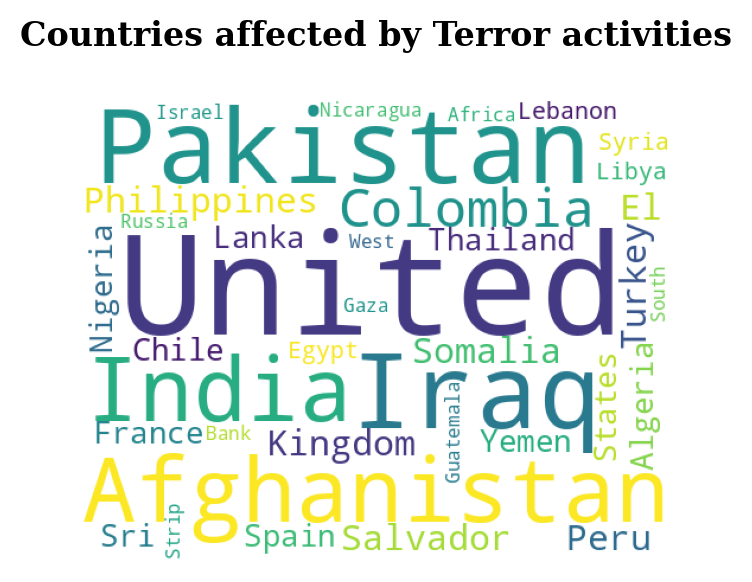

In [106]:
#Code - 
cities = tot_attack['Country']
plt.subplots(figsize=(4,3),dpi = 200)
wordcloud= WordCloud(background_color='White',
                     width=500,
                     height=390).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Countries affected by Terror activities\n',
          fontdict={'family':'serif','color':'black','weight':'bold','size':12})
plt.show()

In [71]:
#Sub-setting Main DataSet for location analysis - 
 
location_df = gt_df[['Year','Country','Region','State','City','latitude','longitude']]

## **3.Demographical analysis of top 3 countries most affected by terrorist activties -**

### **3.1. No.1 Most affected Country - IRAQ** : 

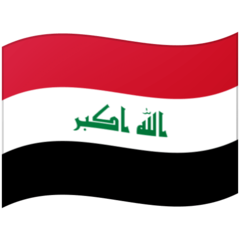

Located in the Middle East, **Iraq** is a country with a diverse landscape and a rich historical and cultural heritage. Here is a general geographical description of **Iraq**:

1. **Borders and Surroundings**:
Iraq is bordered by several countries, including Iran to the east, Kuwait to the southeast, Saudi Arabia to the south, Jordan to the southwest, Syria to the west, and Turkey to the north. To the southeast, Iraq has a coastline along the Persian Gulf.

2. **Topography**:
The topography of Iraq is characterized by a combination of plains, plateaus, and mountain ranges. The Tigris and Euphrates rivers, which flow from the northwest to the southeast, are the major waterways that shape the landscape. 

3. **Plains and Plateaus**:
The northern part of Iraq is predominantly mountainous, with the Zagros Mountains running along the border with Iran.Moving southward, the terrain transitions into broad plains, such as the **Nineveh Plain, the Diyala Plain, and the Dibdiba Plateau**.

4. **Marshes and Wetlands**:
In the southeastern part of the country, near the Iranian border, lie the vast Mesopotamian Marshes. These wetlands, particularly the Central Marshes and the Hammar Marshes, are fed by the Tigris and Euphrates rivers. 

5. **Desert Regions**:
To the west and southwest of the Tigris and Euphrates rivers, stretches the vast Iraqi desert, known as the Arabian Desert.The western part of Iraq includes the **Anbar** province, which is predominantly desert terrain.

6. **Major Cities**:
Iraq's capital city is **Baghdad**, situated along the Tigris River. Other major cities include **Mosul, Basra, Erbil, Sulaymaniyah, Najaf, Karbala, and Kirkuk**. 


In [111]:
#Code - 
Iraq_loc_df = location_df[location_df['Country'] == 'Iraq'].dropna(how = 'any')
iraq_states = pd.DataFrame(Iraq_loc_df['State'].value_counts().reset_index())
iraq_states.columns= ['State','Atacks']

iraq_states = iraq_states.head(5)

mask_i = pd.DataFrame(Iraq_loc_df[['Year','State']].value_counts().reset_index())
mask_i.columns = ['Year','State','Attacks']
list_of_top = ['Baghdad','Saladin','Al Anbar','Nineveh','Diyala']
mask_i = mask_i[mask_i.State.isin(list_of_top)]

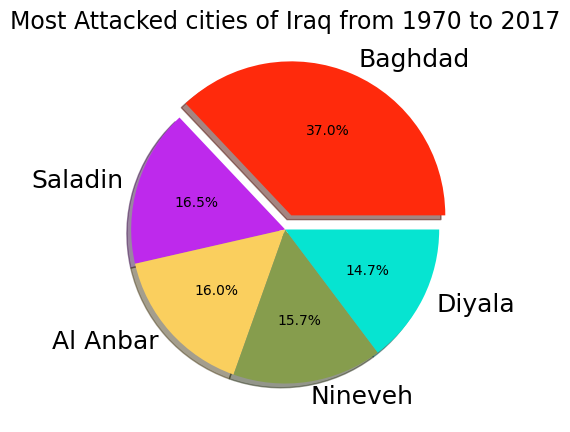

In [141]:
#Visual 1-
#Pieplot code - 

plt.figure(figsize=(5,5))
df = iraq_states['Atacks']
explode = (0.1,0,0,0,0)
colors = ['#ff2a0c','#be29ec','#facf5e','#869d4d','#06e4d1']
plt.pie(df, labels=iraq_states['State'], autopct='%1.1f%%',explode = explode,shadow = True, colors = colors)
plt.title("Most Attacked cities of Iraq from 1970 to 2017",fontsize=17,color='Black')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



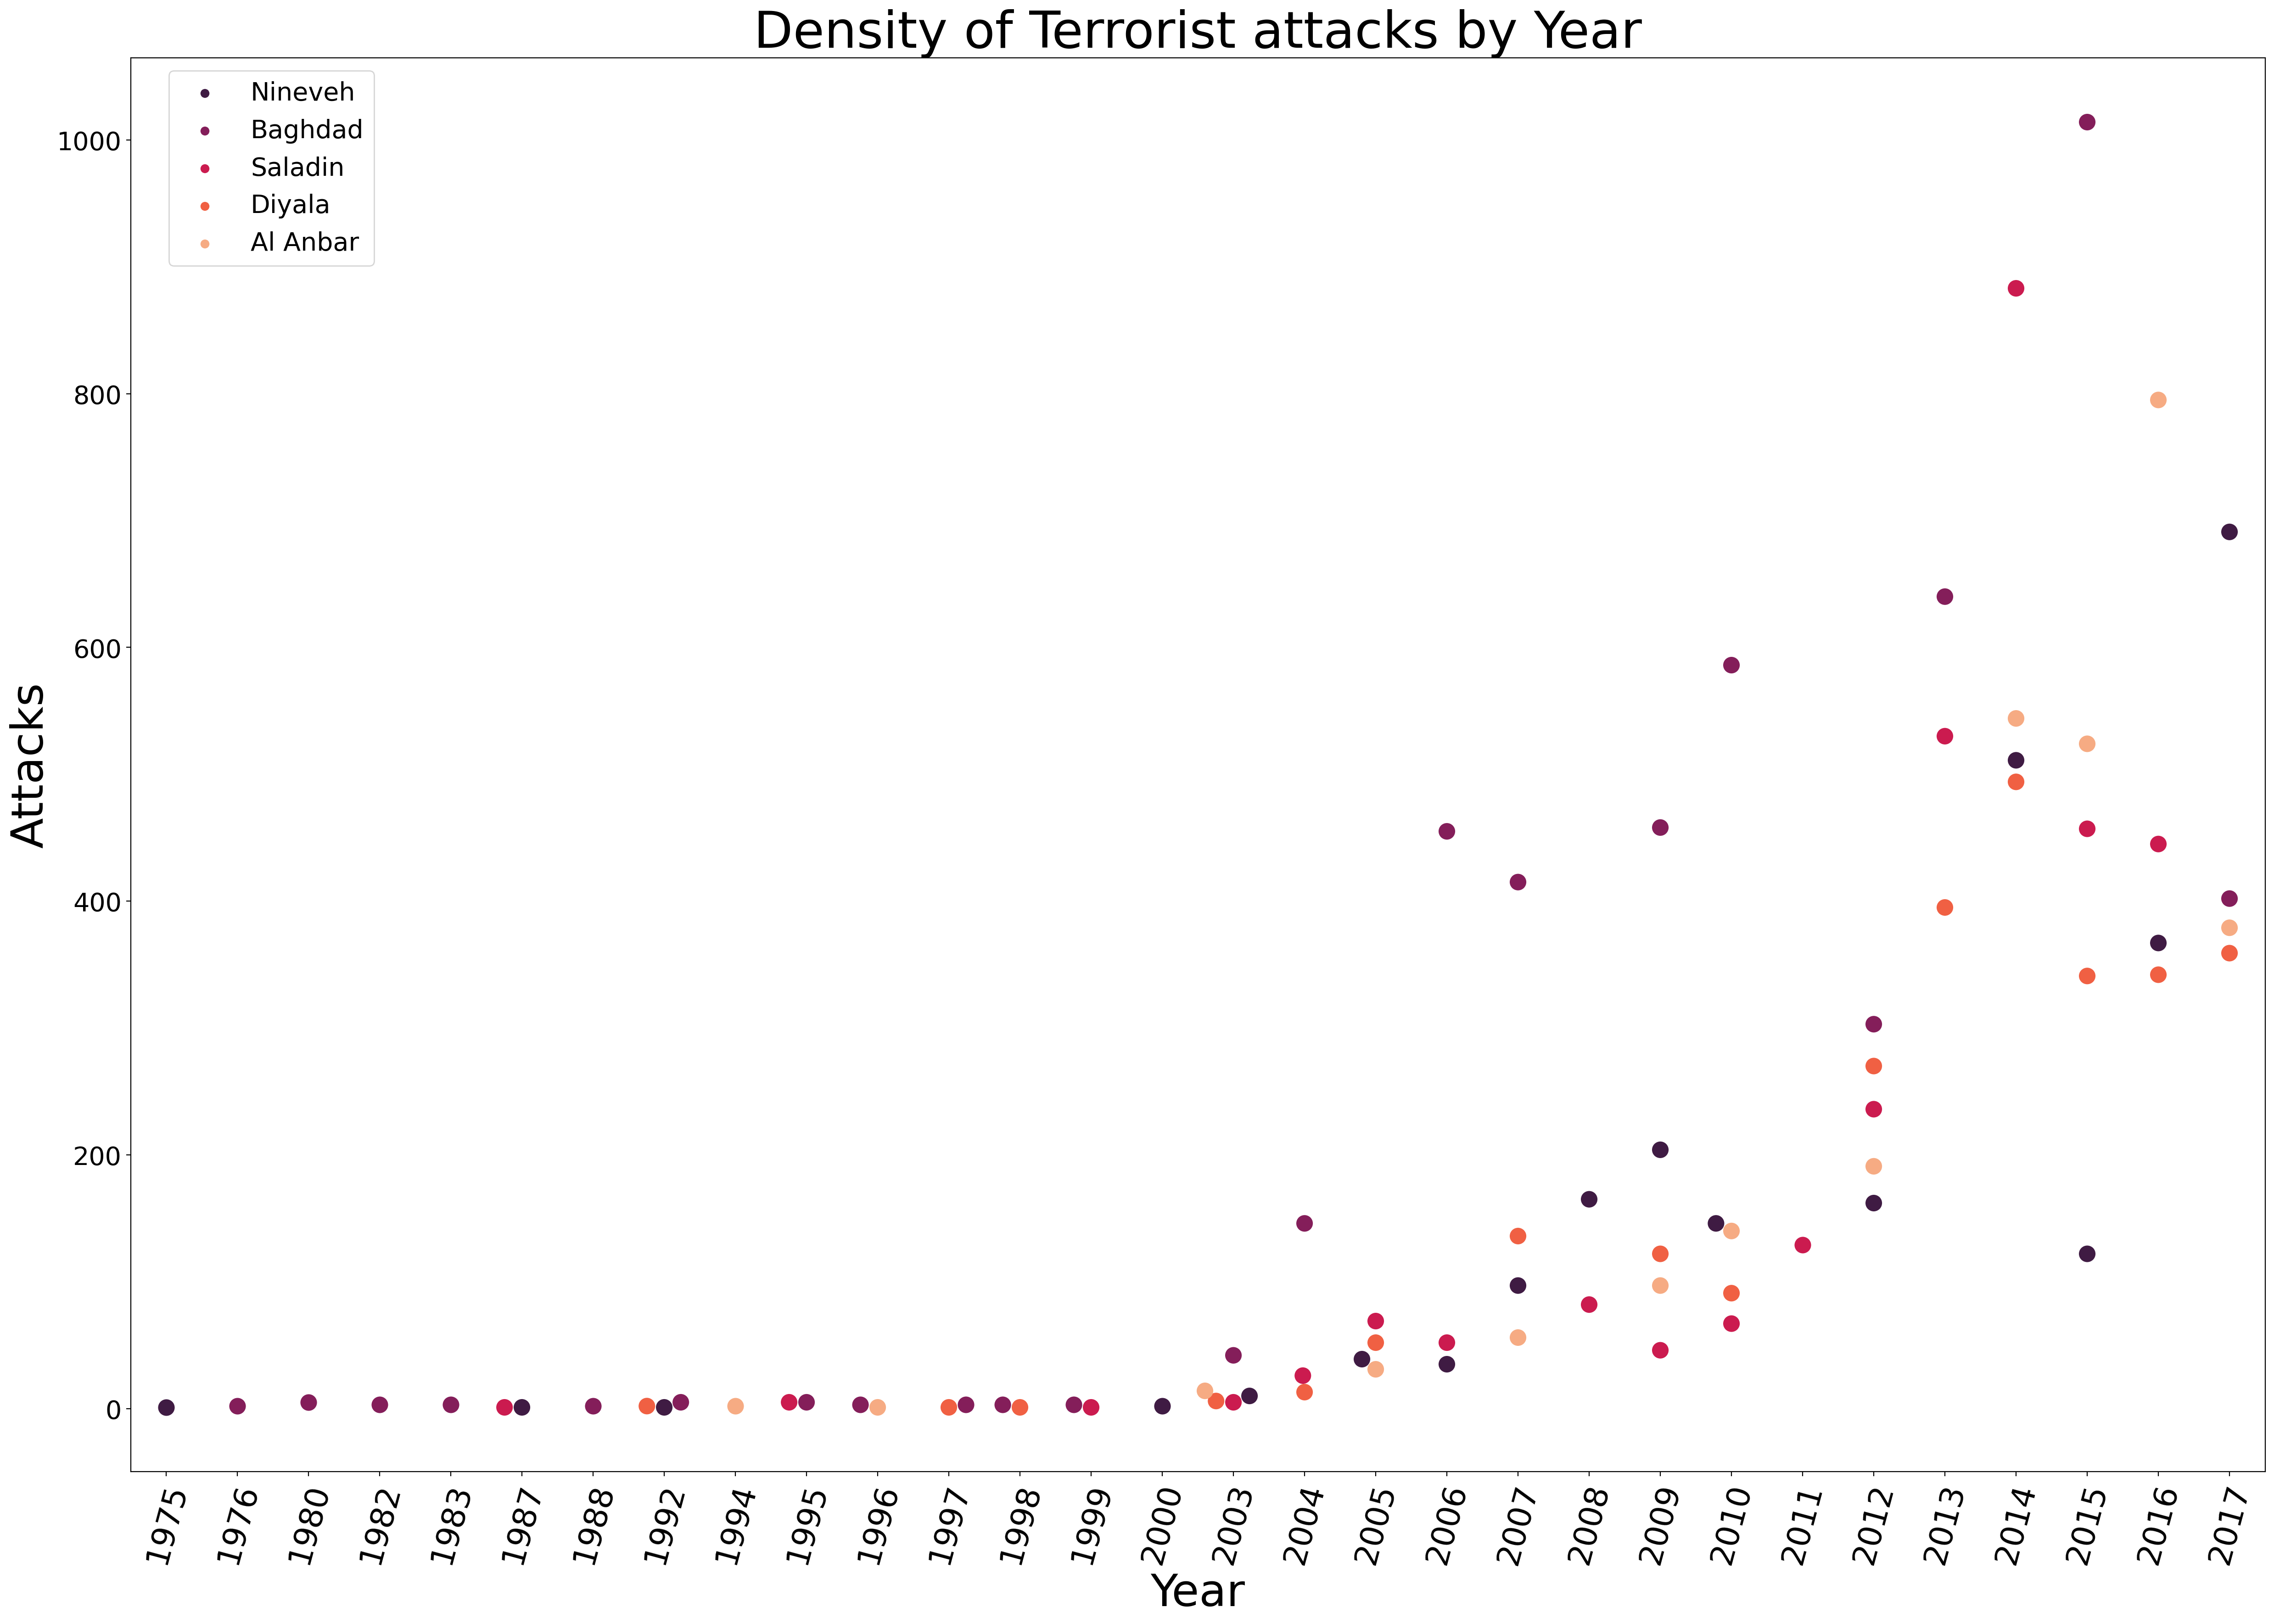

In [113]:
#Visual 2-
#Swarmplot code - 
plt.figure(figsize = (30,20), dpi = 200)
sns.swarmplot(data = mask_i.sample(80), x = 'Year',y = 'Attacks', hue = 'State',size = 13,palette = 'rocket')
plt.xticks(rotation = 75, fontsize = 25)
plt.yticks(fontsize = 20)
plt.xlabel('Year',fontsize = 35)
plt.ylabel('Attacks',fontsize = 35)
plt.title('Density of Terrorist attacks by Year',fontsize = 40)
plt.legend(bbox_to_anchor = (0.12,1),fontsize = 20)
plt.show()

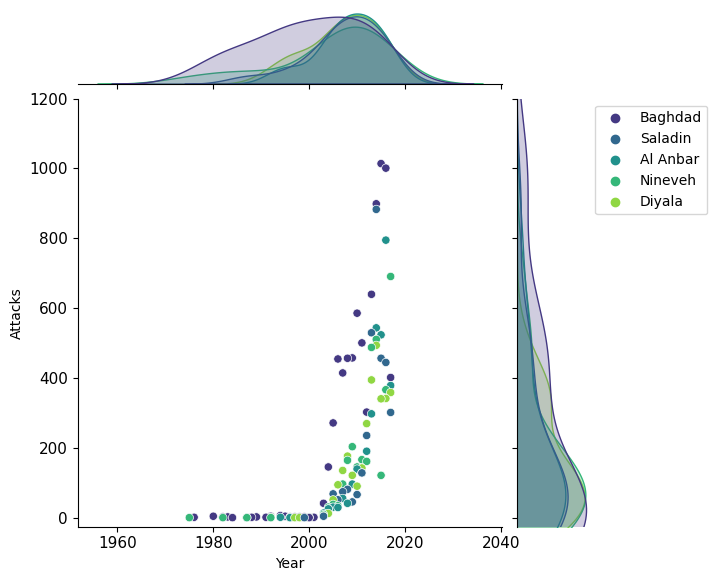

In [114]:
#Visual 3 -

#Jointplot code - 
colors = ['#d40b8d','#be29ec','#facf5e','#869d4d','#06e4d1']
sns.jointplot(data = mask_i,x = 'Year',y = 'Attacks',hue = 'State',palette = 'viridis')
plt.ylim(-25,1200)
plt.legend(bbox_to_anchor = (1.5,1),fontsize =10)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()


#### **3.1.1 Analysis of terrorist activities in Iraq :**

In [115]:
#Creating custom function to tabulate attack failures - 
def failure_count(num):
    if num == 0:
        return 1
    else:
        return 0

In [116]:
#Code - 
var = gt_df[gt_df['Country'] == 'Iraq']
attack_group = var[['Year','Month','iday','Success','Group_name']]

attack_group.insert(loc = 4, column = 'Failure',value = attack_group['Success'].apply(failure_count))
overall = pd.pivot_table(data = attack_group,index = 'Group_name',values = ['Success','Failure'],aggfunc = np.sum)
overall['Total_attacks'] = overall['Failure']+overall['Success']
overall['Success_rate'] = round((overall['Success']/overall['Total_attacks'])*100,2)

overall_top10 = overall.nlargest(n = 11, columns= 'Total_attacks')
overall_top10 = overall_top10.drop('Unknown',axis = 0)

overall_top5 = overall_top10.nlargest(5,columns= 'Total_attacks')
top5gang = overall_top5.reset_index()['Group_name']


In [117]:
overall_top10

Failure  Success  Total_attacks  \
Group_name                                                                     
Islamic State of Iraq and the Levant (ISIL)      805     3992           4797   
Al-Qaida in Iraq                                  14      618            632   
Islamic State of Iraq (ISI)                        5      140            145   
Asa'ib Ahl al-Haqq                                 1       66             67   
Gunmen                                             7       50             57   
Tawhid and Jihad                                   5       44             49   
Al-Naqshabandiya Army                              2       33             35   
Muslim extremists                                  4       28             32   
Ansar al-Islam                                     2       26             28   
Kurdistan Workers' Party (PKK)                     3       20             23   

                                             Success_rate  
Group_name                                                 
Islamic State of Iraq and the Levant (ISIL)         83.22  
Al-Qaida in Iraq                                    97.78  
Islamic State of Iraq (ISI)                         96.55  
Asa'ib Ahl al-Haqq                                  98.51  
Gunmen                                              87.72  
Tawhid and Jihad                                    89.80  
Al-Naqshabandiya Army                               94.29  
Muslim extremists                                   87.50  
Ansar al-Islam                                      92.86  
Kurdistan Workers' Party (PKK)                      86.96

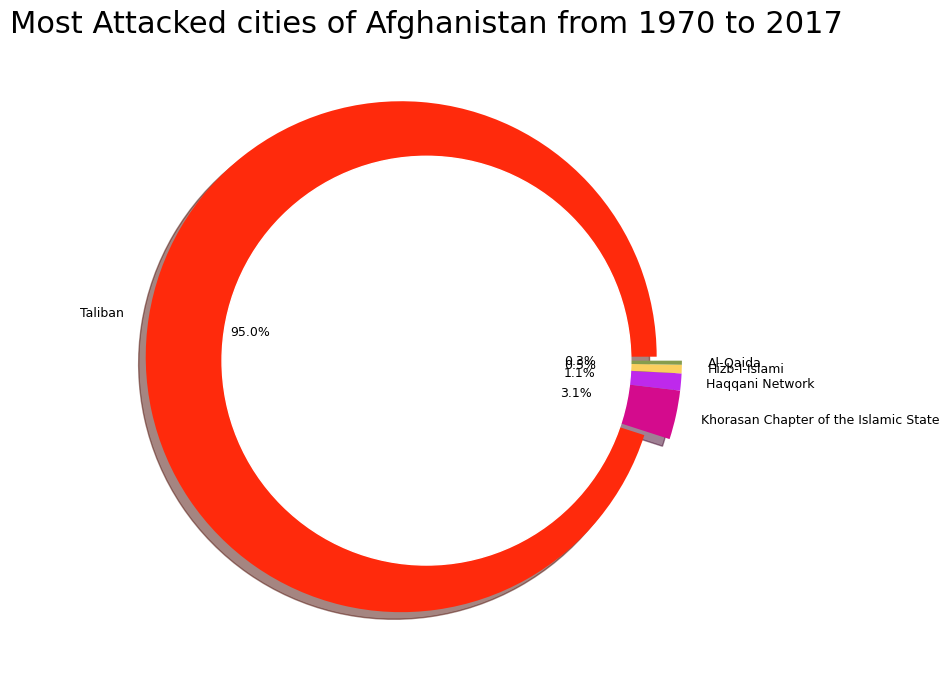

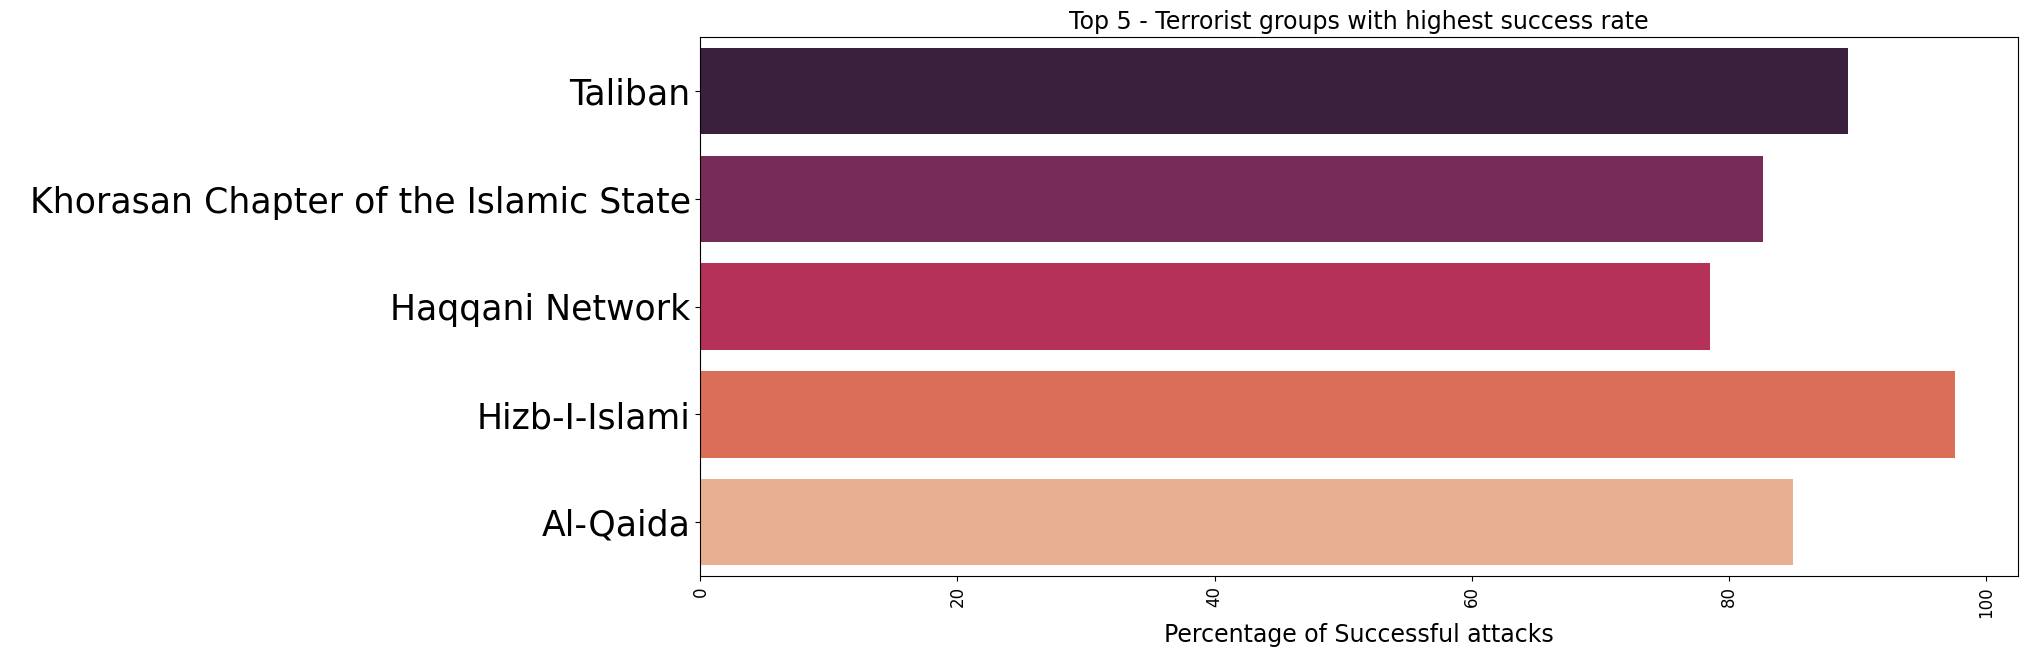

In [146]:
#Visual - 

#Pieplot code - 

df = overall_top5['Total_attacks']
explode = (0.1, 0,0, 0,0) 
colors = ['#ff2a0c','#d40b8d','#be29ec','#facf5e','#869d4d','#06e4d1','#283482','#e6ff05','#e1a28e','#00a898']
plt.pie(df, labels=overall_top5.index, autopct='%1.1f%%',explode = explode, shadow = True,colors = colors, radius = 1,textprops={'fontsize': 9})
my_circle = plt.Circle((0,0),0.8,color='white')
p=plt.gcf().gca().add_artist(my_circle)
plt.rcParams['figure.figsize'] = (17,7)
plt.title("Most Attacked cities of Afghanistan from 1970 to 2017",fontsize=22,color='Black')
plt.tight_layout()
plt.show()

#Barplot - 

sns.barplot(data = overall_top5, x = 'Success_rate',y = overall_top5.index, palette = 'rocket')
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 25)
plt.ylabel(' ')
plt.xlabel('Percentage of Successful attacks', fontsize = 17)
plt.title('Top 5 - Terrorist groups with highest success rate', fontsize = 17)
plt.show()

In [119]:
#Code - 

overall2 = pd.pivot_table(data = attack_group,index = ['Group_name','Year'],values = ['Success','Failure'],aggfunc = np.sum)
overall2.reset_index()
overall2.sort_values(by = 'Year',ascending = True, inplace = True)
overall2['Total_attacks'] = overall2['Failure']+overall2['Success']
overall2['Success_rate'] = round((overall2['Success']/overall2['Total_attacks'])*100,2)
overall2.sort_values(by = 'Total_attacks', ascending = False, inplace = True)
overall2 = overall2.reset_index()
overall2 = overall2[overall2['Group_name'].isin(top5gang)]
overall2.sort_values(by = 'Year', ascending = True, inplace = True)

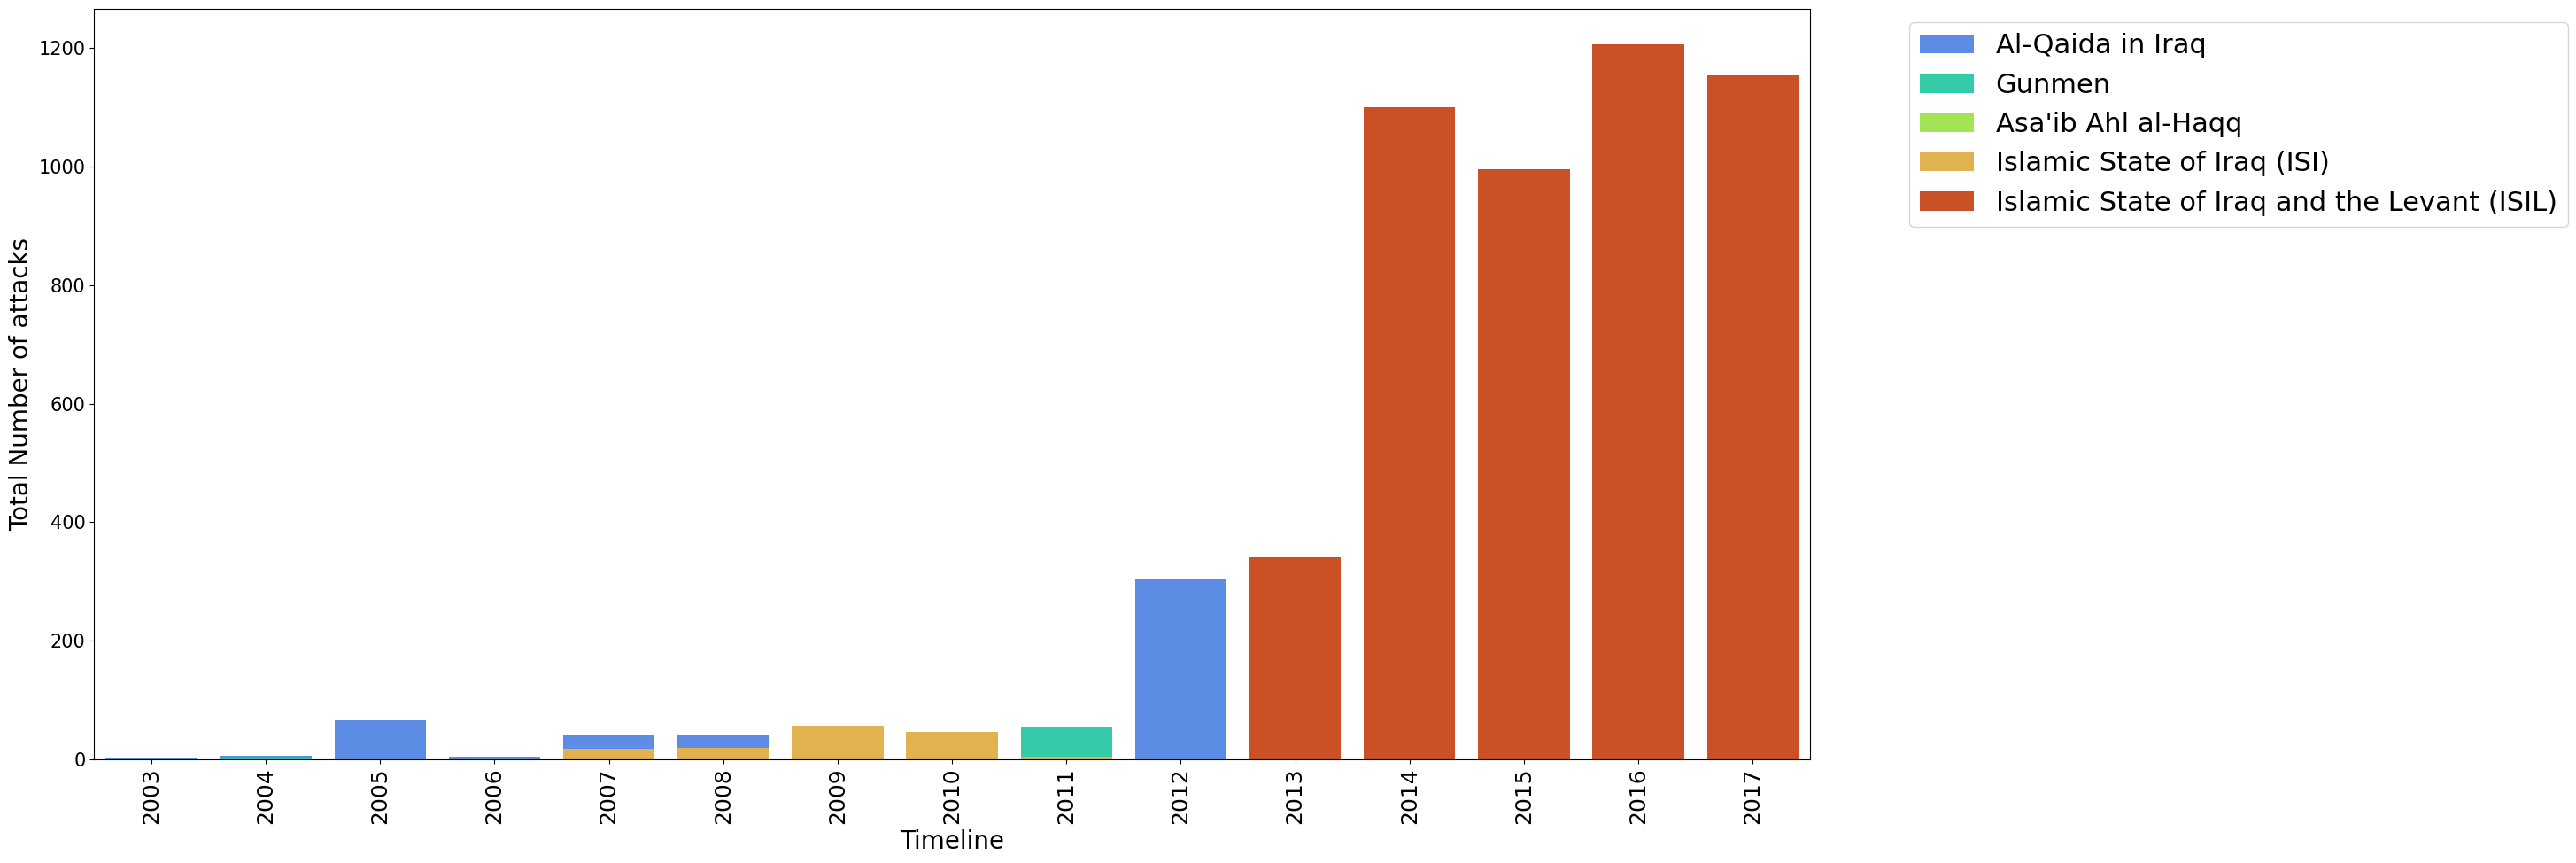

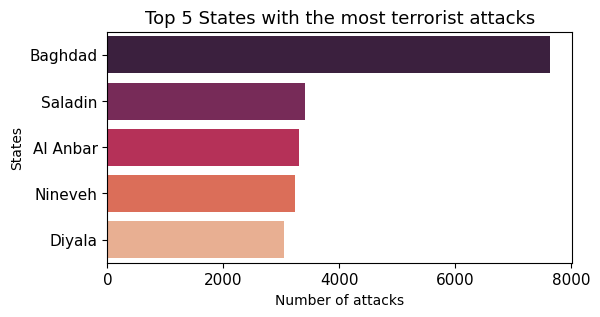

In [120]:
#Visualisation - 

#Barplot code - 
plt.figure(figsize = (25,11))
sns.barplot(data = overall2, x = 'Year',y ='Total_attacks', hue = 'Group_name', dodge = False, palette = 'turbo')
plt.legend(bbox_to_anchor = (1.05,1),fontsize =22)
plt.xticks(rotation = 90)
plt.yticks(fontsize = 15)
plt.ylabel('Total Number of attacks', fontsize = 20)
plt.xlabel('Timeline',fontsize =20)
plt.show()

#Barplot code -
plt.figure(figsize = (6,3))
sns.barplot(data = iraq_states, x = 'Atacks', y = 'State', palette = 'rocket')

plt.title('Top 5 States with the most terrorist attacks',fontsize = 13)
plt.xlabel('Number of attacks')
plt.ylabel('States')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.show()

# Insights to be written

### 3.2. **No.2** Most affected Country - **PAKISTAN** : 




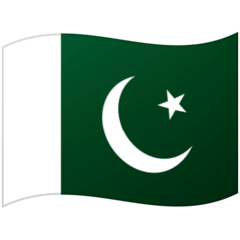

**Pakistan** is a country located in South Asia and is known for its diverse geography, ranging from high mountains to coastal areas. Here is a general geographical description of Pakistan:

1. **Borders and Surroundings**:
Pakistan shares borders with several countries, including India to the east, Afghanistan and Iran to the west, China to the northeast, and the Arabian Sea to the south. The country's strategic location provides it with geopolitical significance.

2. **Mountain Ranges**:
The northern and northwestern regions of Pakistan are dominated by the mighty mountain ranges of the Hindu Kush, Karakoram, and the Himalayas. These ranges are home to some of the world's highest peaks, including K2, the second-highest mountain on Earth. The northern areas, such as Gilgit-Baltistan and Khyber Pakhtunkhwa, are renowned for their stunning natural landscapes and attract adventurers and mountaineers from around the world.

3. **Plateaus and Plains**:
To the south and east of the mountainous regions lie vast plateaus and fertile plains. The Balochistan Plateau covers a significant portion of southwestern Pakistan, characterized by arid deserts, rugged hills, and vast stretches of barren land. The Punjab and Sindh plains are located in the eastern part of the country.

4. **Indus River**:
The mighty Indus River flows through the length of Pakistan, from the mountainous regions in the north to the Arabian Sea in the south.The Indus River Valley is home to some of Pakistan's most populous cities, including **Lahore** and **Karachi**.

5. **Coastal Areas**:
Pakistan has a coastline along the Arabian Sea in the south, spanning approximately 1,050 kilometers. The coastline is characterized by sandy beaches, marshy areas, and mangrove forests. The port city of **Karachi**, located on the coast, is a major economic and industrial hub of the country.

6. **Deserts**:
In addition to the arid regions of **Balochistan**, Pakistan is home to the Thar Desert, located in the southeastern part of the country, near the border with India.

In [121]:
#Code-
Pakistan_loc_df = location_df[location_df['Country'] == 'Pakistan'].dropna(how = 'any')
pak_states = pd.DataFrame(Pakistan_loc_df['State'].value_counts().reset_index())
pak_states.columns= ['State','Atacks']
pak_states = pak_states.head(5)

mask_p = pd.DataFrame(Pakistan_loc_df[['Year','State']].value_counts().reset_index())
mask_p.columns = ['Year','State','Attacks']
list_of_top = ['Balochistan','Sindh','Khyber Pakhtunkhwa','Nort-West Frontier Province',
               'Ghazni','Federally Administered Tribal Areas']
mask_p = mask_p[mask_p.State.isin(list_of_top)]

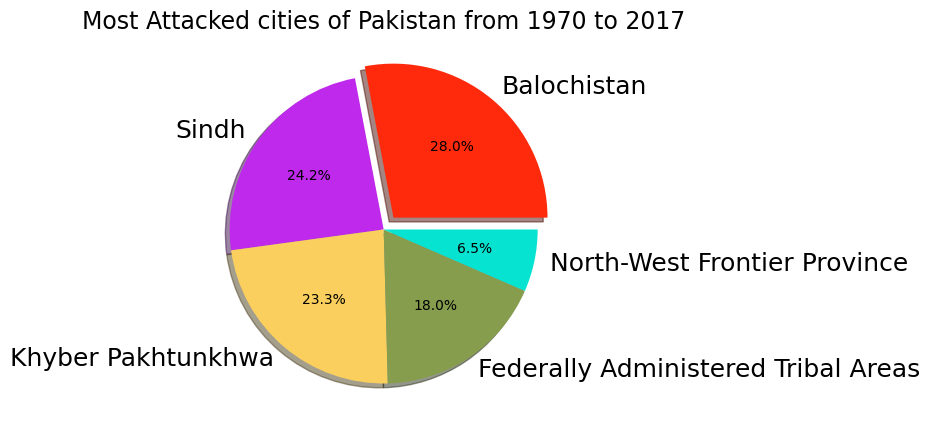

In [142]:
#Visual - 
#Pieplot code - 

plt.figure(figsize=(5,5))
df = pak_states['Atacks']
explode = (0.1, 0,0, 0,0) 
colors = ['#ff2a0c','#be29ec','#facf5e','#869d4d','#06e4d1','#9f8170']
plt.pie(df, labels=pak_states['State'], autopct='%1.1f%%',explode = explode, shadow = True,colors = colors)
plt.title("Most Attacked cities of Pakistan from 1970 to 2017",fontsize=17,color='Black')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



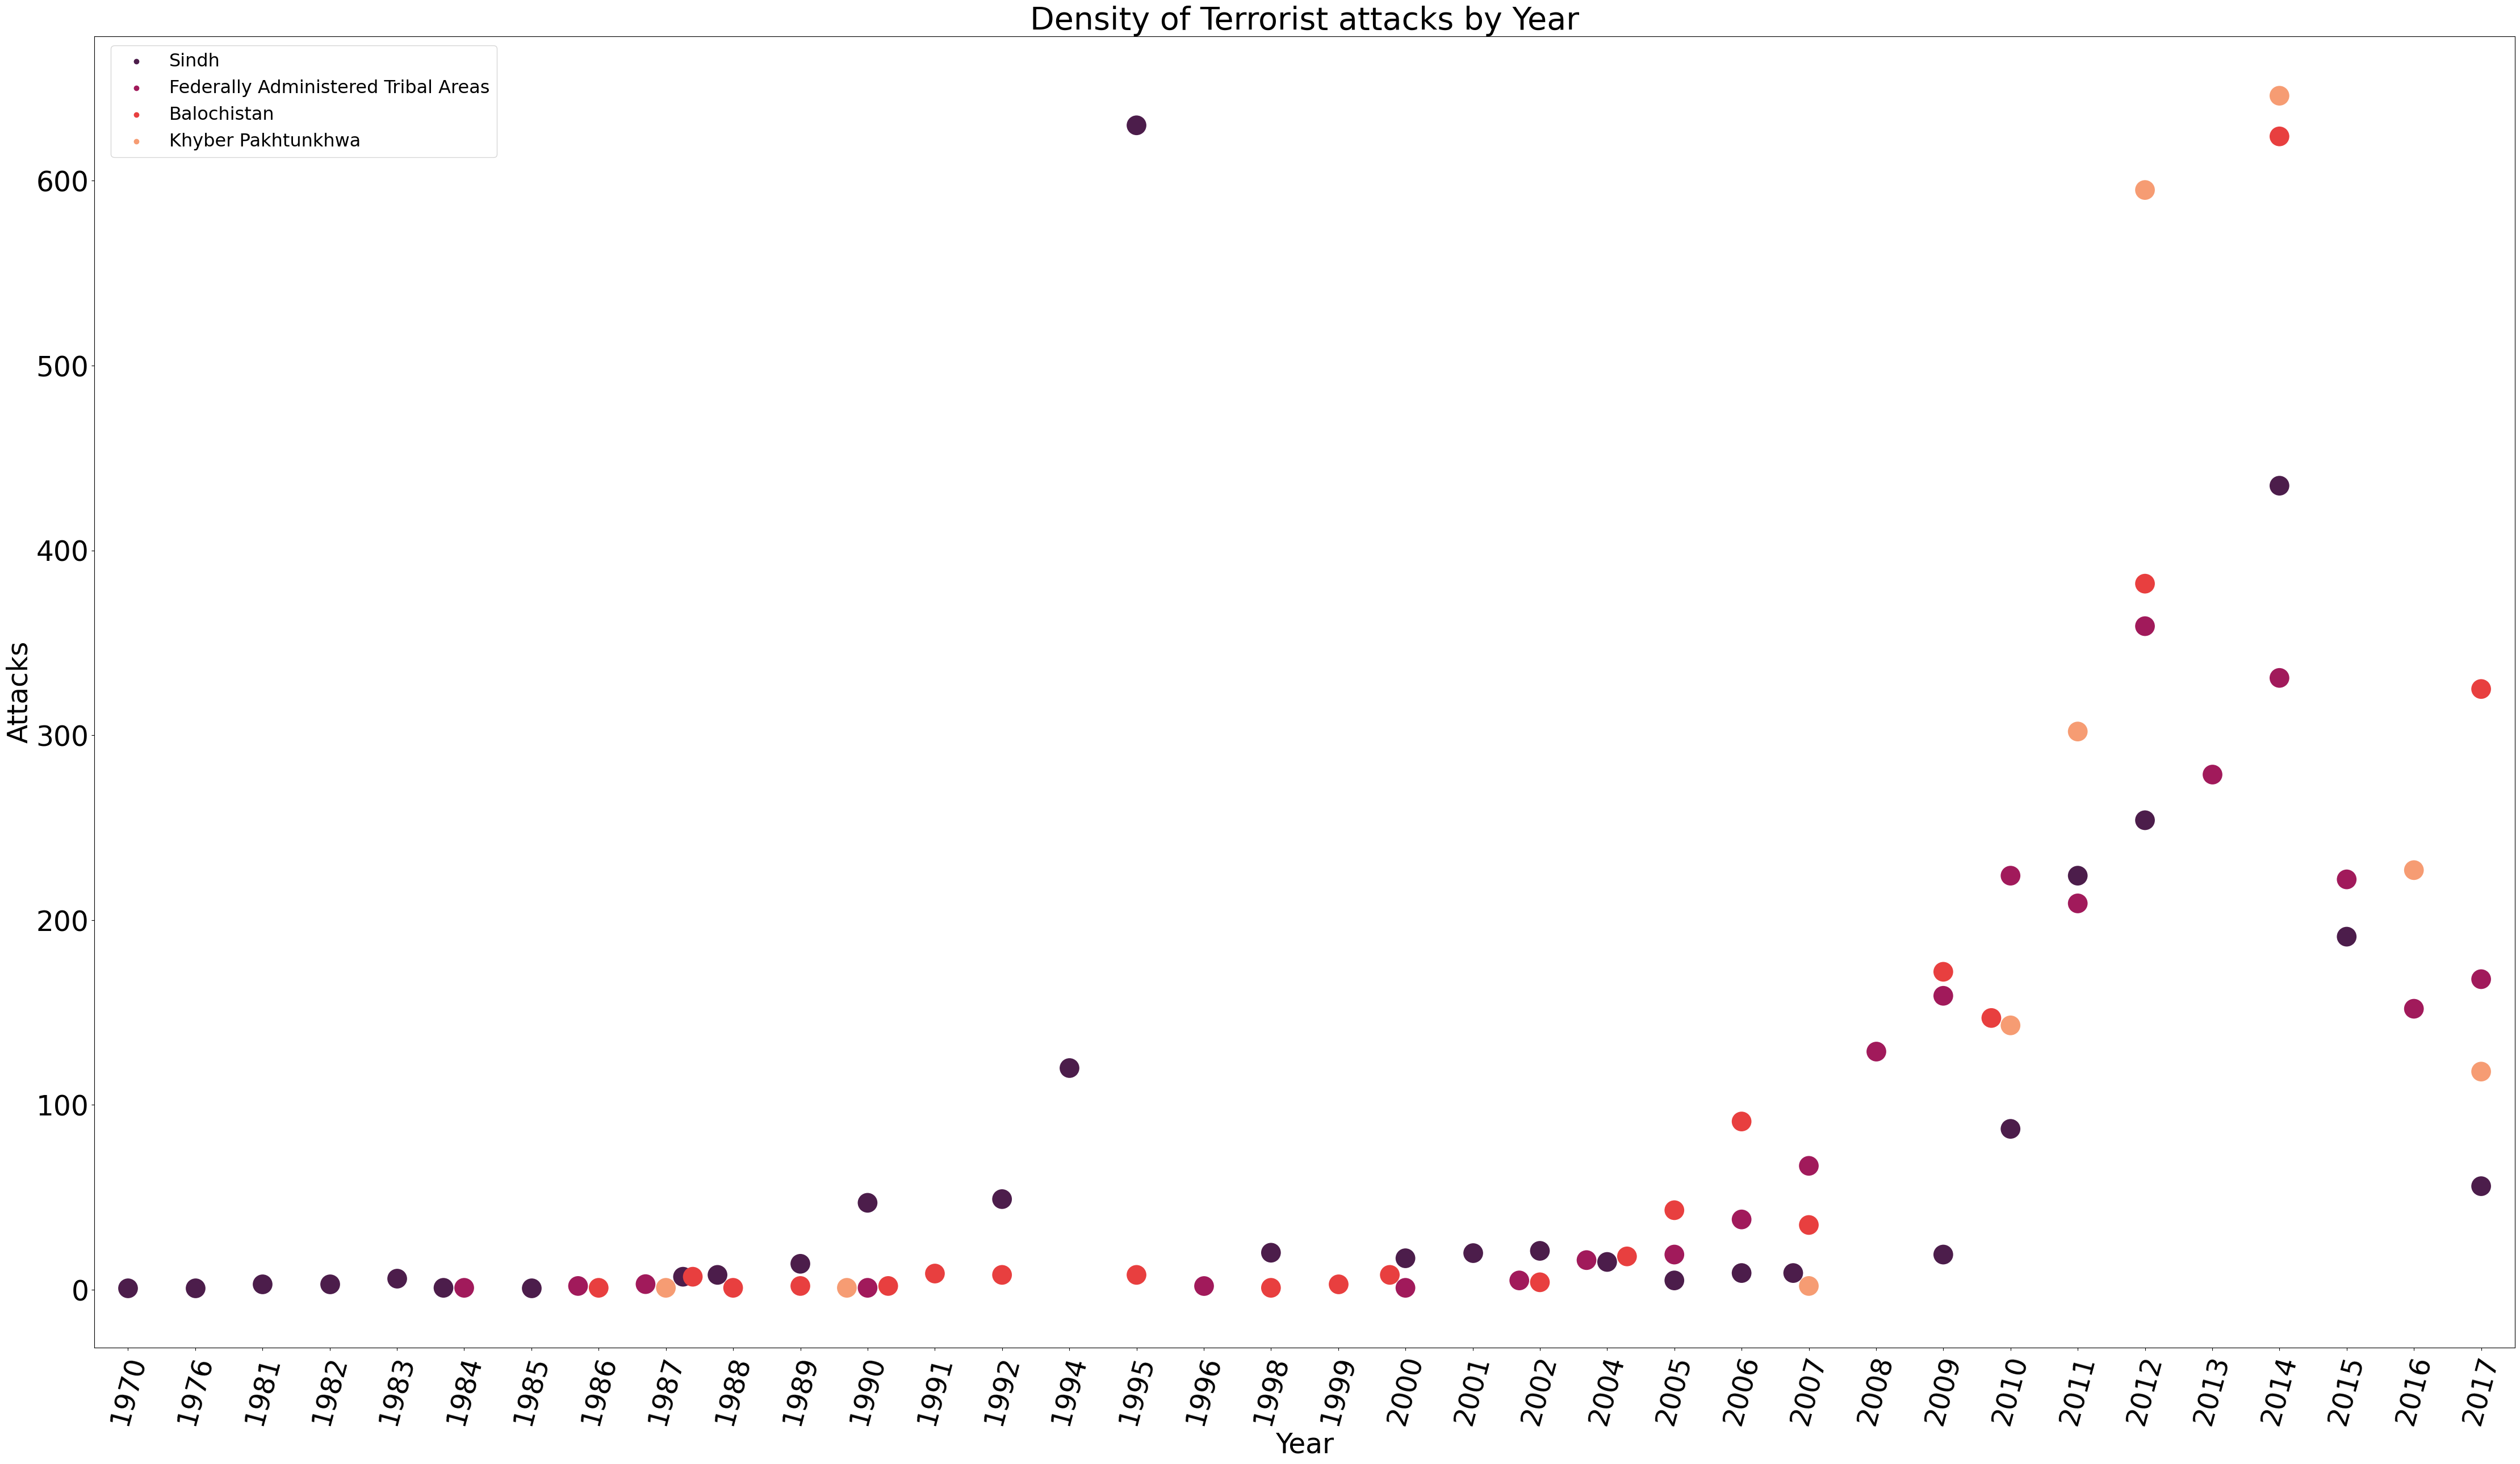

In [123]:
#Visual 2-

#Swarmplot code - 

plt.figure(figsize = (55,30))
sns.swarmplot(data = mask_p.sample(80), x = 'Year',y = 'Attacks', hue = 'State',size =25,palette = 'rocket')
plt.xticks(rotation = 75, fontsize = 35)
plt.yticks(fontsize = 35)
plt.xlabel('Year',fontsize = 35)
plt.ylabel('Attacks',fontsize = 35)
plt.title('Density of Terrorist attacks by Year',fontsize = 40)
plt.legend(bbox_to_anchor = (0.17,1),fontsize = 23)
plt.show()

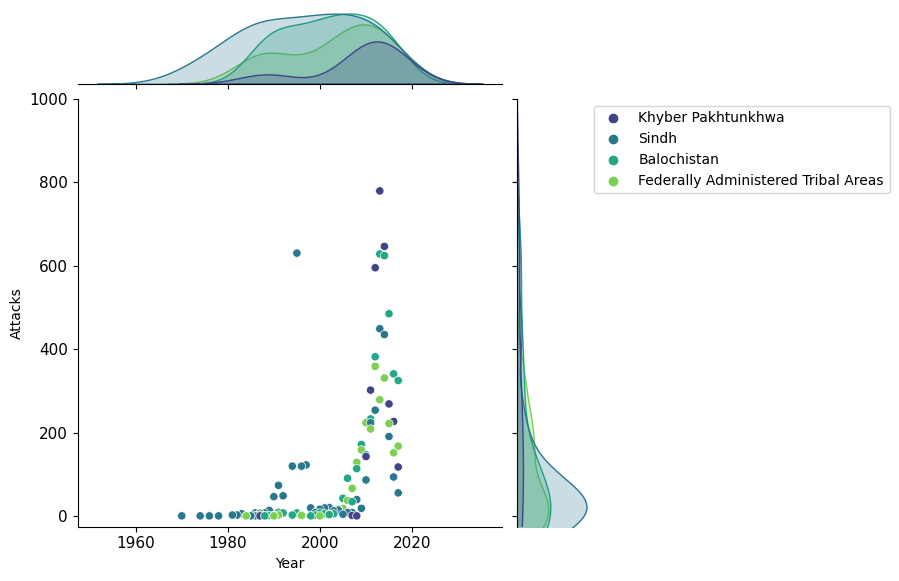

In [124]:
#Visual 3-

#Jointplot code - 

sns.jointplot(data = mask_p,x = 'Year',y = 'Attacks',hue = 'State', palette = 'viridis')
plt.ylim(-25,1000)
plt.legend(bbox_to_anchor = (1.2,1),fontsize =10)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()



#### 3.2.1 Analysis of terrorist activities in Pakistan :

In [125]:
#Creating custom function to tabulate attack failures - 
def failure_count(num):
    if num == 0:
        return 1
    else:
        return 0

In [126]:
#Code - 
var = gt_df[gt_df['Country'] == 'Pakistan']
attack_group = var[['Year','Month','iday','Success','Group_name']]

attack_group.insert(loc = 4, column = 'Failure',value = attack_group['Success'].apply(failure_count))
overall = pd.pivot_table(data = attack_group,index = 'Group_name',values = ['Success','Failure'],aggfunc = np.sum)
overall['Total_attacks'] = overall['Failure']+overall['Success']
overall['Success_rate'] = round((overall['Success']/overall['Total_attacks'])*100,2)

overall_top10 = overall.nlargest(n = 11, columns= 'Total_attacks')
overall_top10 = overall_top10.drop('Unknown',axis = 0)

overall_top5 = overall_top10.nlargest(5,columns= 'Total_attacks')
top5gang = overall_top5.reset_index()['Group_name']

In [127]:
overall_top10

Failure  Success  Total_attacks  \
Group_name                                                               
Tehrik-i-Taliban Pakistan (TTP)             80     1255           1335   
Baloch Republican Army (BRA)                22      290            312   
Baloch Liberation Front (BLF)               19      166            185   
Baloch Liberation Army (BLA)                 7      174            181   
Muttahida Qami Movement (MQM)                7      167            174   
Lashkar-e-Jhangvi                            8      127            135   
Lashkar-e-Islam (Pakistan)                   8      116            124   
Khorasan Chapter of the Islamic State        8       88             96   
United Baloch Army (UBA)                     3       86             89   
Sindhu Desh Liberation Army (SDLA)           0       57             57   

                                       Success_rate  
Group_name                                           
Tehrik-i-Taliban Pakistan (TTP)               94.01  
Baloch Republican Army (BRA)                  92.95  
Baloch Liberation Front (BLF)                 89.73  
Baloch Liberation Army (BLA)                  96.13  
Muttahida Qami Movement (MQM)                 95.98  
Lashkar-e-Jhangvi                             94.07  
Lashkar-e-Islam (Pakistan)                    93.55  
Khorasan Chapter of the Islamic State         91.67  
United Baloch Army (UBA)                      96.63  
Sindhu Desh Liberation Army (SDLA)           100.00

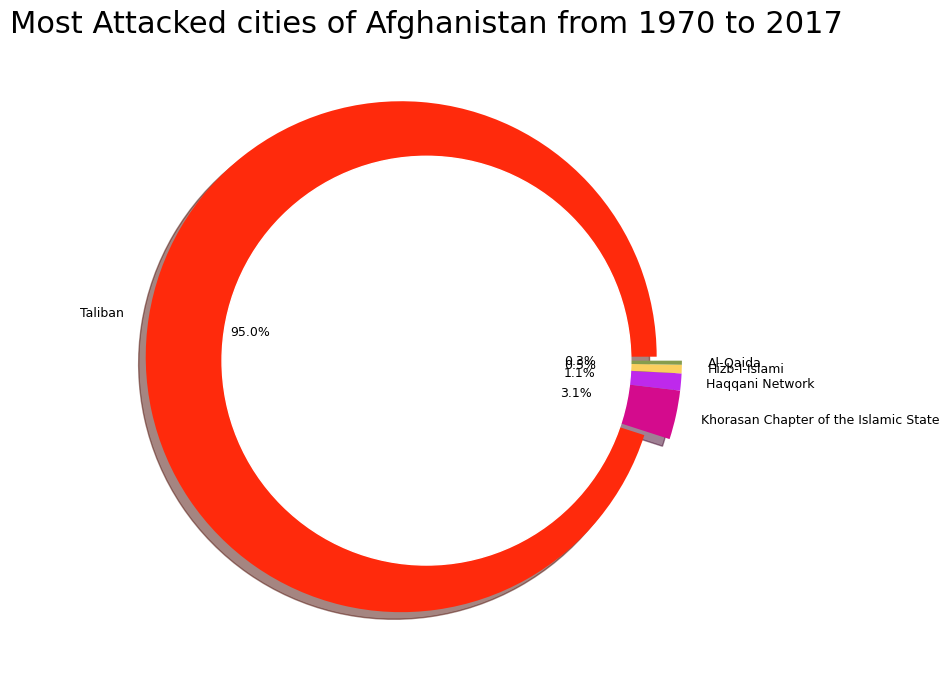

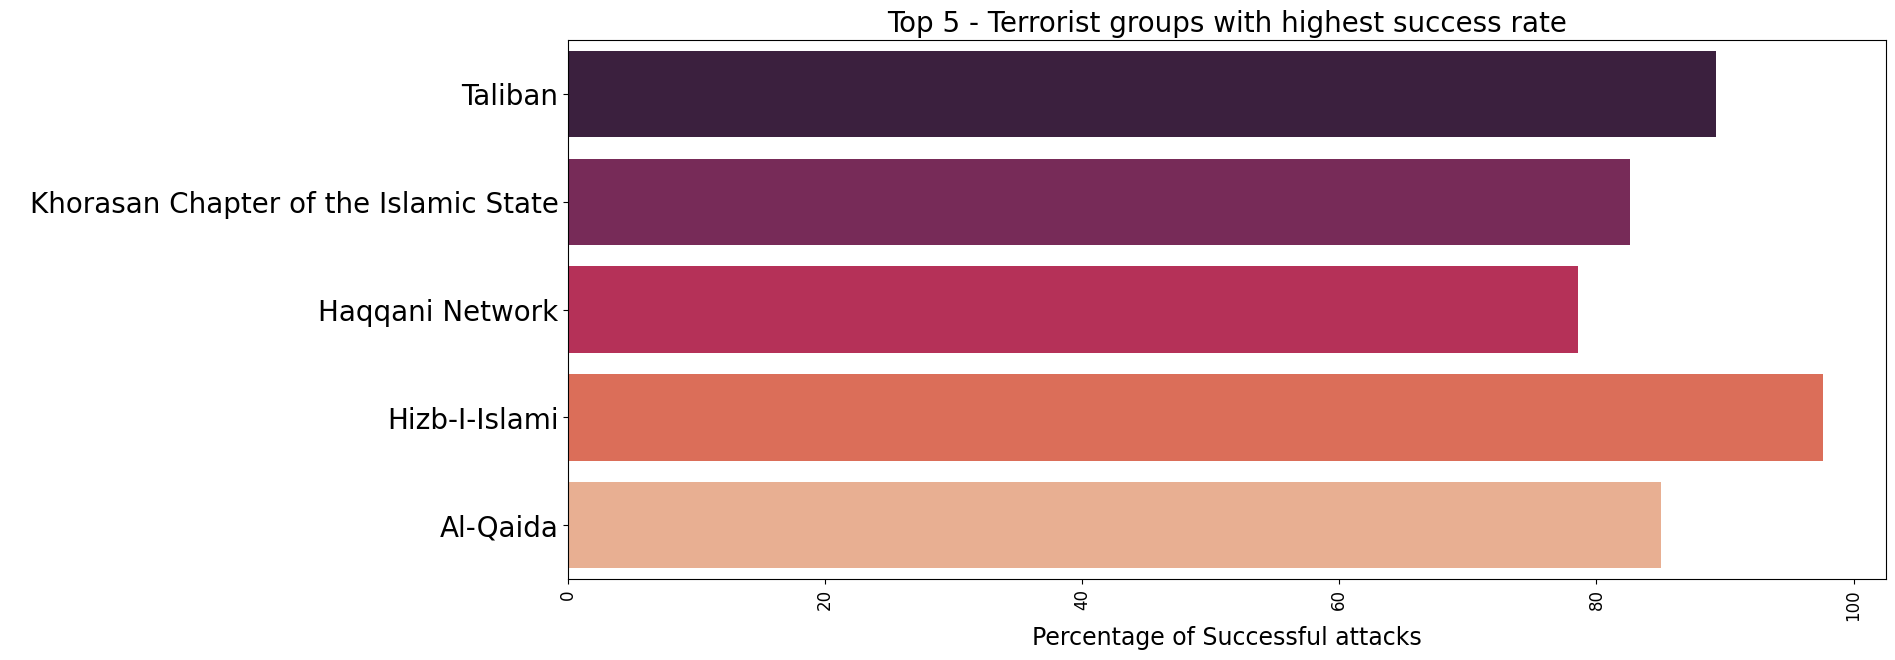

In [145]:
#Visual - 

#Pieplot code - 

df = overall_top5['Total_attacks']
explode = (0.1, 0,0, 0,0) 
colors = ['#ff2a0c','#d40b8d','#be29ec','#facf5e','#869d4d','#06e4d1','#283482','#e6ff05','#e1a28e','#00a898']
plt.pie(df, labels=overall_top5.index, autopct='%1.1f%%',explode = explode, shadow = True,colors = colors, radius = 1,textprops={'fontsize': 9})
my_circle = plt.Circle((0,0),0.8,color='white')
p=plt.gcf().gca().add_artist(my_circle)
plt.rcParams['figure.figsize'] = (17,7)
plt.title("Most Attacked cities of Afghanistan from 1970 to 2017",fontsize=22,color='Black')
plt.tight_layout()
plt.show()

#Barplot - 
sns.barplot(data = overall_top5, x = 'Success_rate',y = overall_top5.index, palette = 'rocket')
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 20)
plt.ylabel(' ')
plt.xlabel('Percentage of Successful attacks', fontsize = 17)
plt.title('Top 5 - Terrorist groups with highest success rate', fontsize = 20)
plt.show()


In [129]:
#Code - 

overall2 = pd.pivot_table(data = attack_group,index = ['Group_name','Year'],values = ['Success','Failure'],aggfunc = np.sum)
overall2.reset_index()
overall2.sort_values(by = 'Year',ascending = True, inplace = True)
overall2['Total_attacks'] = overall2['Failure']+overall2['Success']
overall2['Success_rate'] = round((overall2['Success']/overall2['Total_attacks'])*100,2)
overall2.sort_values(by = 'Total_attacks', ascending = False, inplace = True)
overall2 = overall2.reset_index()
overall2 = overall2[overall2['Group_name'].isin(top5gang)]
overall2.sort_values(by = 'Year', ascending = True, inplace = True)

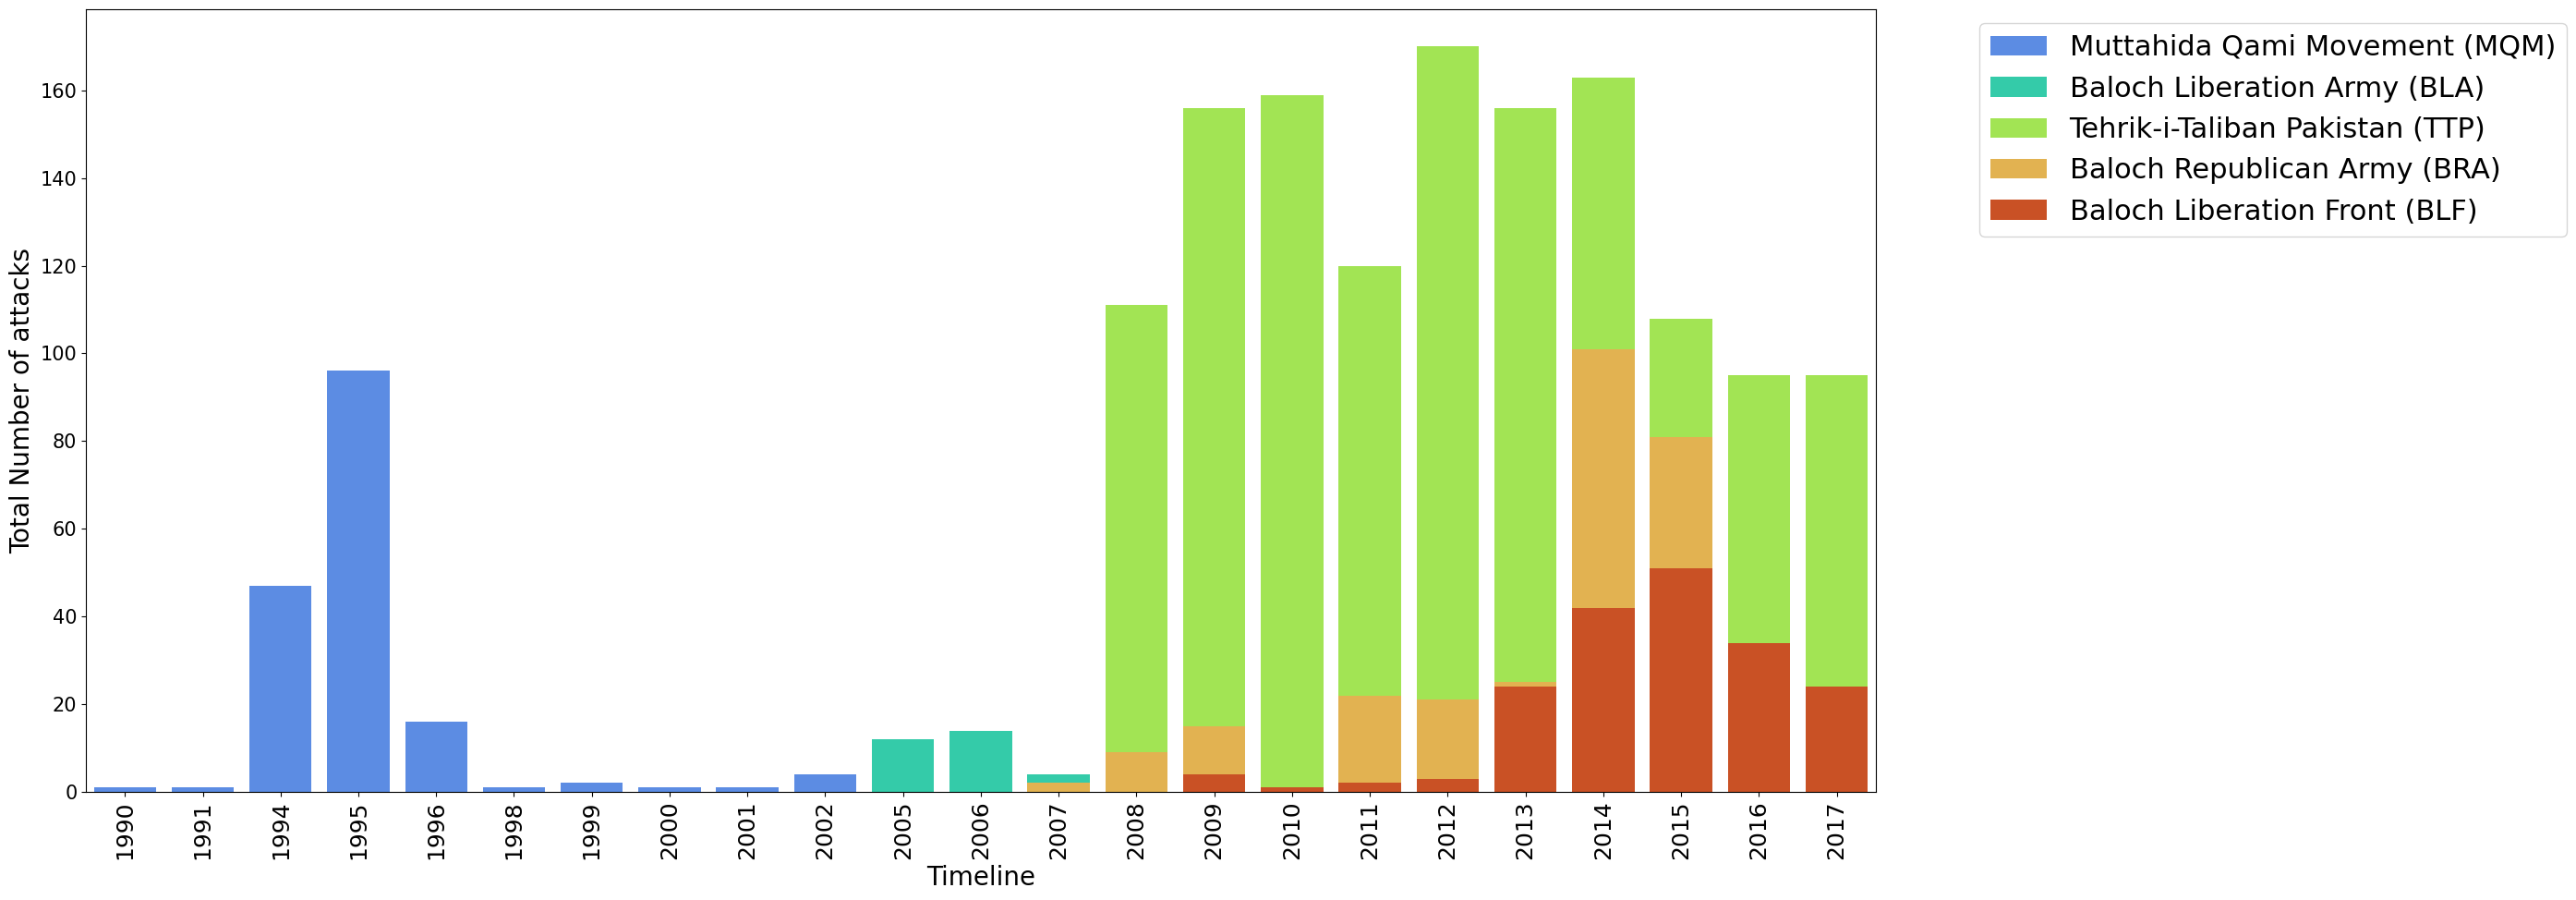

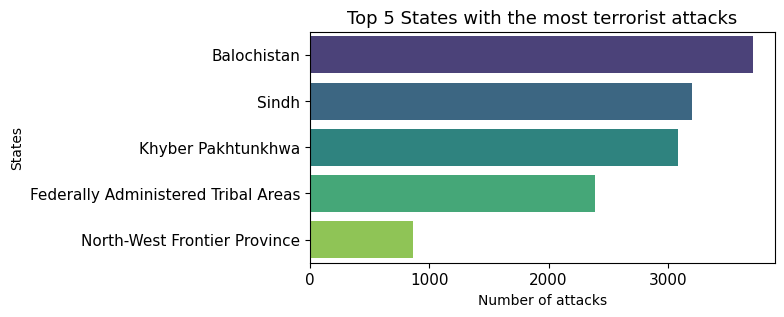

In [130]:
#Visualisation - 

#Barplot code - 
plt.figure(figsize = (25,11))
sns.barplot(data = overall2, x = 'Year',y ='Total_attacks', hue = 'Group_name', dodge = False, palette = 'turbo')
plt.legend(bbox_to_anchor = (1.05,1),fontsize =22)
plt.xticks(rotation = 90)
plt.yticks(fontsize = 15)
plt.ylabel('Total Number of attacks', fontsize = 20)
plt.xlabel('Timeline',fontsize =20)
plt.show()

#Barplot code - 

plt.figure(figsize = (6,3))
sns.barplot(data = pak_states, x = 'Atacks', y = 'State', palette = 'viridis')

plt.title('Top 5 States with the most terrorist attacks',fontsize = 13)
plt.xlabel('Number of attacks')
plt.ylabel('States')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.show()

# Insights to be written

### 3.3. **No.3** Most affected Country - **Afghanistan** : 

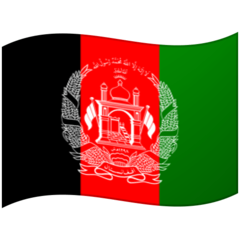

**Afghanistan**, a landlocked country in **Central Asia**, is known for its rugged and diverse geography. Here is a general geographical description of **Afghanistan**:

1.**Borders and Surroundings**:
**Afghanistan** is bordered by several countries, including Iran to the west, Pakistan to the south and east, Turkmenistan, Uzbekistan, and Tajikistan to the north, and China to the northeast. Its location at the crossroads of Central, South, and West Asia has influenced its historical and cultural connections with neighboring regions.

2.**Mountainous Terrain**:
Afghanistan is dominated by rugged mountain ranges, including the Hindu Kush, which runs from east to west throughout the country. The northeastern part of Afghanistan is home to the **Pamir Mountains**. 

3.**Central Highlands**:
The central part of **Afghanistan** consists of high plateaus and rolling hills. Located in the centre the highlands, is relatively less mountainous compared to the northern and eastern parts of the country.

4.**The Hindu Kush Range**:
The Hindu Kush range in Afghanistan is notable for its several high peaks, including **Noshaq**, the country's highest peak. The region is prone to severe winters with heavy snowfall, making it a challenging environment for human habitation and travel.

5.**River Valleys**:
Several major rivers flow through Afghanistan, including the **Amu 
     Darya** in the north, which forms part of the border with Tajikistan, and the **Helmand River** in the southwest.

6.**Deserts**:
In the south and southwest of **Afghanistan**, near the border with **Iran**, lies the **Dasht-e Margo**, also known as the Registan Desert.

7.**Natural Resources**:
**Afghanistan** is known to have significant mineral resources, including deposits of copper, iron ore, gold, lithium, and natural gas. However, exploitation and development of these resources have been hampered by security challenges and limited infrastructure.

In [131]:
#Code-

Afghanistan_loc_df = location_df[location_df['Country'] == 'Afghanistan'].dropna(how = 'any')
afghan_states = pd.DataFrame(Afghanistan_loc_df['State'].value_counts().reset_index())
afghan_states.columns= ['State','Atacks']
afghan_states = afghan_states.head(5)

mask_a = pd.DataFrame(Afghanistan_loc_df[['Year','State']].value_counts().reset_index())
mask_a.columns = ['Year','State','Attacks']
list_of_top = ['Helmand','Kandahar','Nangarhar','Kabul','Ghazni']
mask_a = mask_a[mask_a.State.isin(list_of_top)]


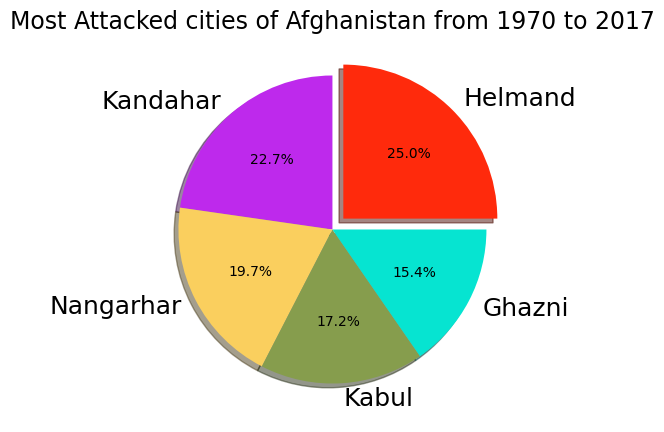

In [143]:
#Visual 1- 
#Pieplot code - 

plt.figure(figsize=(5,5))
df = afghan_states['Atacks']
explode = (0.1, 0,0, 0,0) 
colors = ['#ff2a0c','#be29ec','#facf5e','#869d4d','#06e4d1']
plt.pie(df, labels=afghan_states['State'], autopct='%1.1f%%',explode = explode, shadow = True, colors = colors)
plt.title("Most Attacked cities of Afghanistan from 1970 to 2017",fontsize=17,color='Black')
plt.show()


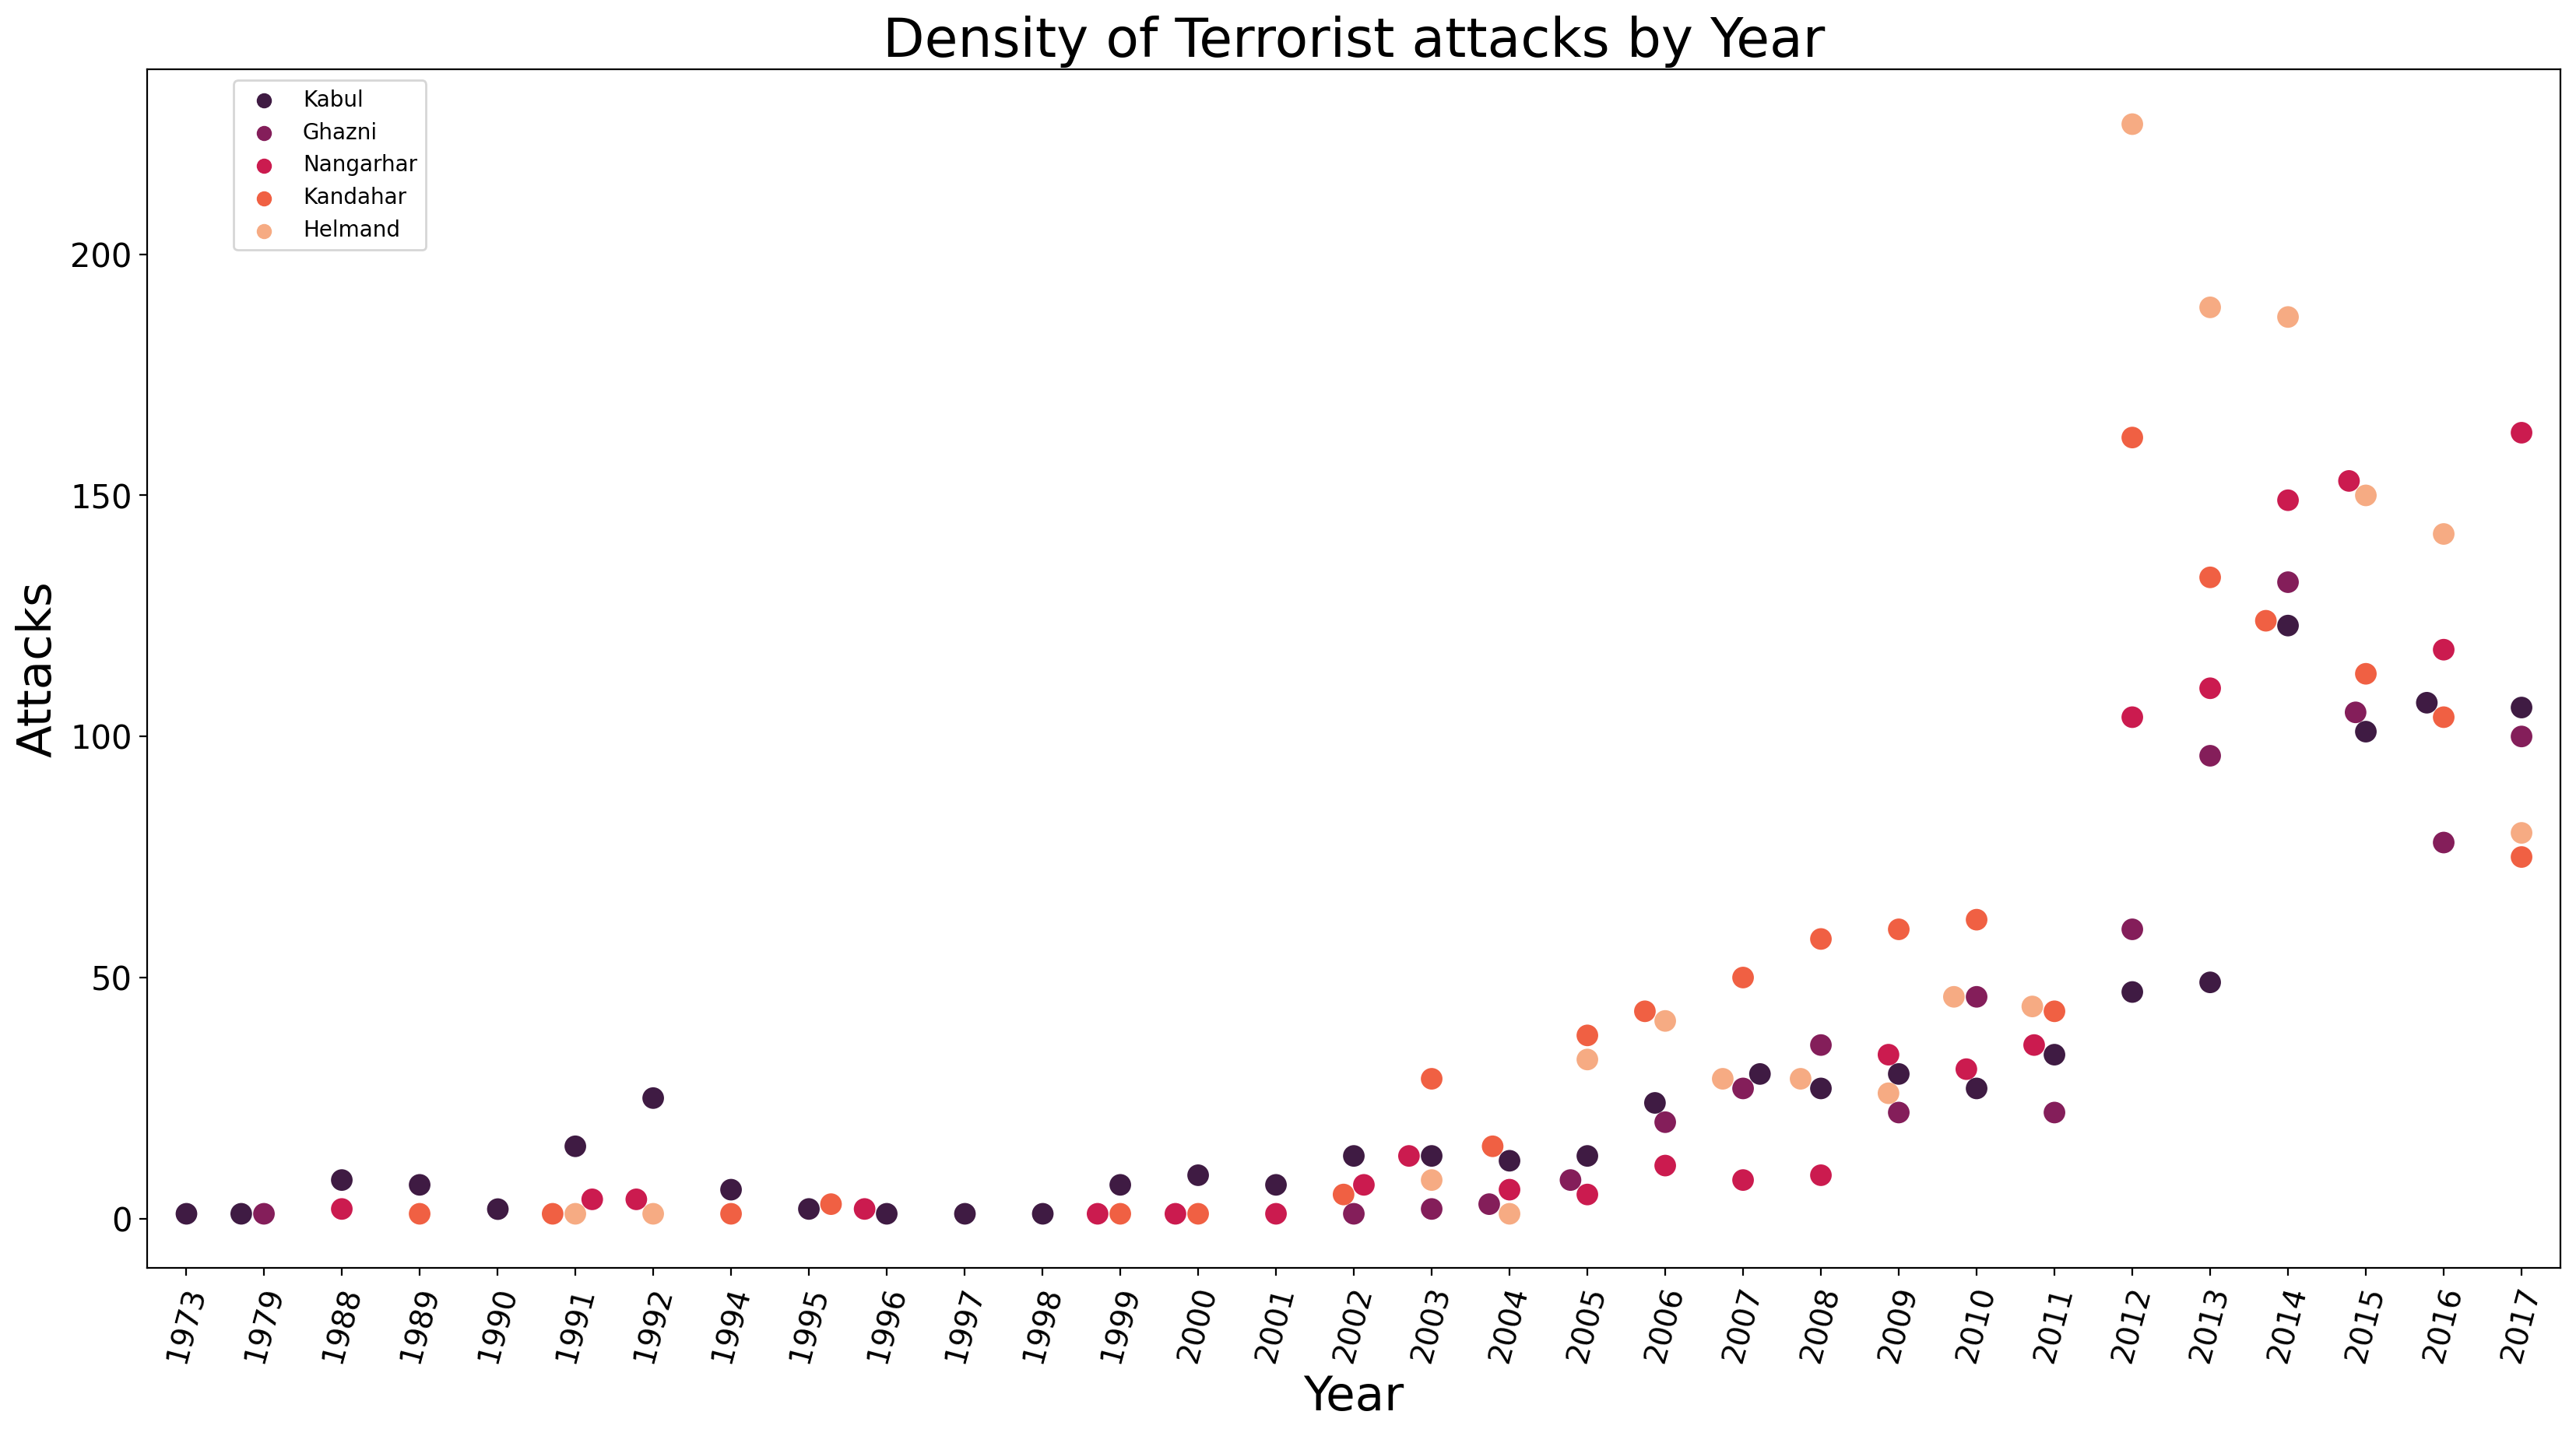

In [133]:
#Visual 2-
#Swarmplot code - 
plt.figure(figsize = (20,10), dpi = 200)
sns.swarmplot(data = mask_a, x = 'Year',y = 'Attacks', hue = 'State',size = 10,palette = 'rocket')
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 15)
plt.xlabel('Year',fontsize = 22)
plt.ylabel('Attacks',fontsize = 22)
plt.title('Density of Terrorist attacks by Year',fontsize = 25)
plt.legend(bbox_to_anchor = (0.12,1))
plt.show()

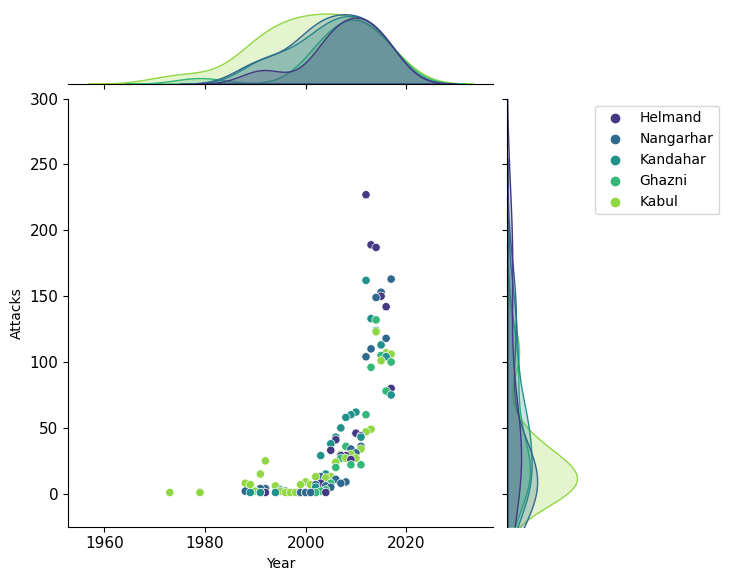

In [134]:
#Visual 3-
#Jointplot code - 

sns.jointplot(data = mask_a,x = 'Year',y = 'Attacks',hue = 'State',palette = 'viridis')
plt.ylim(-25,300)
plt.legend(bbox_to_anchor = (1.55,1),fontsize =10)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()



#### 3.3.1 Analysis of terrorist activities in Afghanistan :

In [135]:
#Creating custom function to tabulate attack failures - 
def failure_count(num):
    if num == 0:
        return 1
    else:
        return 0

In [136]:
#Code - 
var = gt_df[gt_df['Country'] == 'Afghanistan']
attack_group = var[['Year','Month','iday','Success','Group_name']]

attack_group.insert(loc = 4, column = 'Failure',value = attack_group['Success'].apply(failure_count))
overall = pd.pivot_table(data = attack_group,index = 'Group_name',values = ['Success','Failure'],aggfunc = np.sum)
overall['Total_attacks'] = overall['Failure']+overall['Success']
overall['Success_rate'] = round((overall['Success']/overall['Total_attacks'])*100,2)

overall_top10 = overall.nlargest(n = 11, columns= 'Total_attacks')
overall_top10 = overall_top10.drop('Unknown',axis = 0)

overall_top5 = overall_top10.nlargest(5,columns= 'Total_attacks')
top5gang = overall_top5.reset_index()['Group_name']

In [137]:
overall_top10

Failure  Success  Total_attacks  \
Group_name                                                               
Taliban                                    794     6629           7423   
Khorasan Chapter of the Islamic State       42      200            242   
Haqqani Network                             18       66             84   
Hizb-I-Islami                                1       41             42   
Al-Qaida                                     3       17             20   
Tehrik-i-Taliban Pakistan (TTP)              3       12             15   
Gunmen                                       2        7              9   
Afghan Guerrillas                            0        7              7   
Afghan Mujahideen                            1        6              7   
Guerrillas                                   0        6              6   

                                       Success_rate  
Group_name                                           
Taliban                                       89.30  
Khorasan Chapter of the Islamic State         82.64  
Haqqani Network                               78.57  
Hizb-I-Islami                                 97.62  
Al-Qaida                                      85.00  
Tehrik-i-Taliban Pakistan (TTP)               80.00  
Gunmen                                        77.78  
Afghan Guerrillas                            100.00  
Afghan Mujahideen                             85.71  
Guerrillas                                   100.00

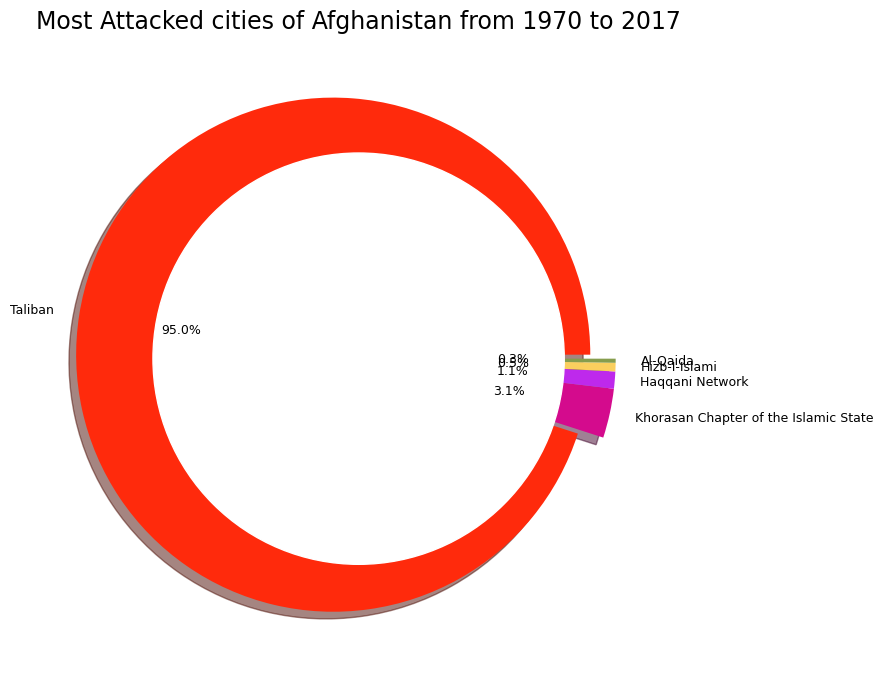

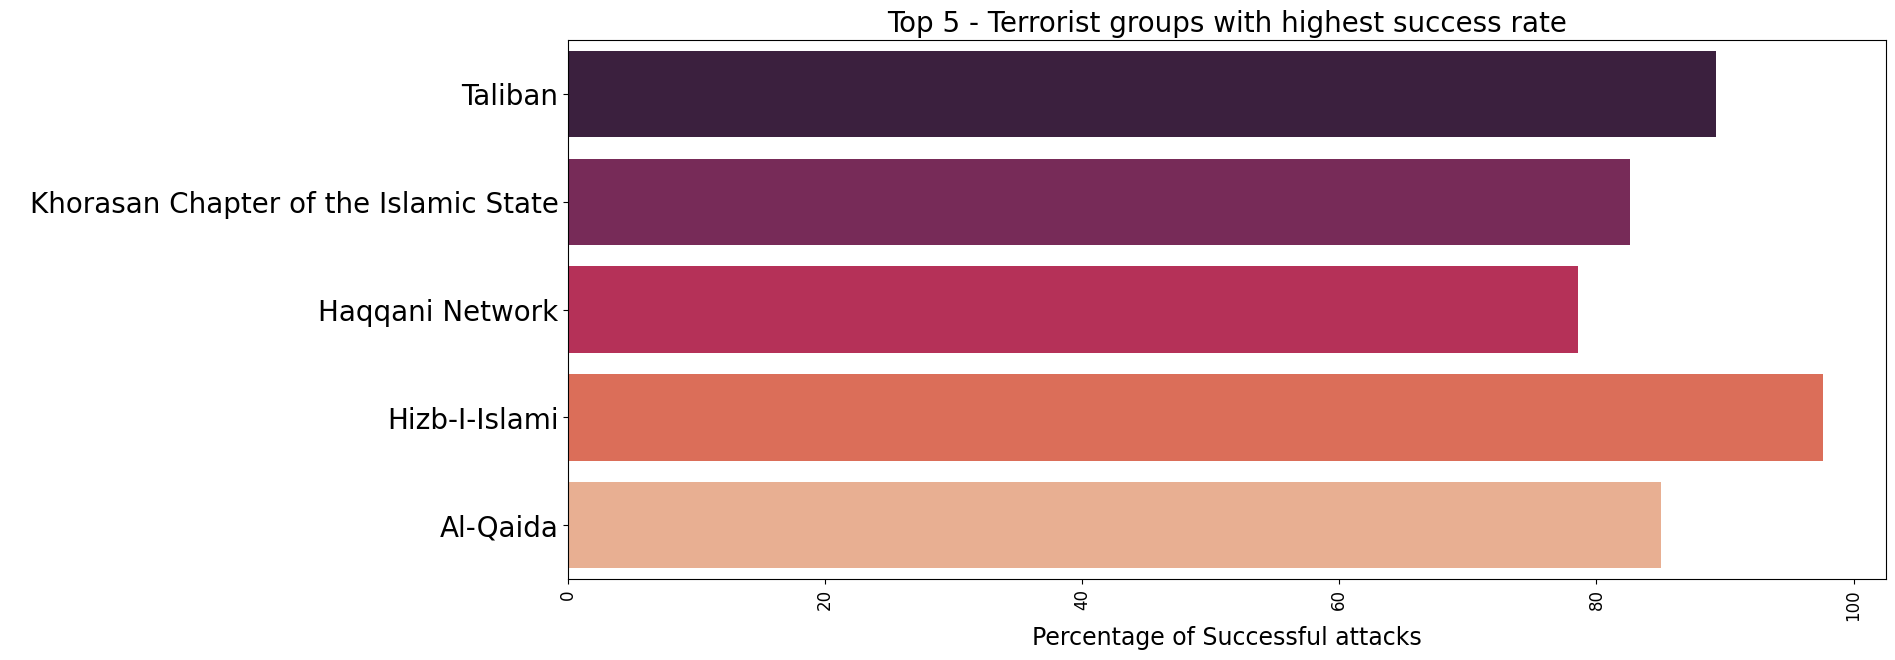

In [144]:
#Visual - 

#Pieplot code - 

df = overall_top5['Total_attacks']
explode = (0.1, 0,0, 0,0) 
colors = ['#ff2a0c','#d40b8d','#be29ec','#facf5e','#869d4d','#06e4d1','#283482','#e6ff05','#e1a28e','#00a898']
plt.pie(df, labels=overall_top5.index, autopct='%1.1f%%',explode = explode, shadow = True,colors = colors, radius = 1,textprops={'fontsize': 9})
my_circle = plt.Circle((0,0),0.8,color='white')
p=plt.gcf().gca().add_artist(my_circle)
plt.rcParams['figure.figsize'] = (17,7)
plt.title("Most Attacked cities of Afghanistan from 1970 to 2017",fontsize=17,color='Black')
plt.tight_layout()
plt.show()

#Barplot - 

sns.barplot(data = overall_top5, x = 'Success_rate',y = overall_top5.index, palette = 'rocket')
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 20)
plt.ylabel(' ')
plt.xlabel('Percentage of Successful attacks', fontsize = 17)
plt.title('Top 5 - Terrorist groups with highest success rate', fontsize = 20)
plt.show()

In [139]:
#Code - 

overall2 = pd.pivot_table(data = attack_group,index = ['Group_name','Year'],values = ['Success','Failure'],aggfunc = np.sum)
overall2.reset_index()
overall2.sort_values(by = 'Year',ascending = True, inplace = True)
overall2['Total_attacks'] = overall2['Failure']+overall2['Success']
overall2['Success_rate'] = round((overall2['Success']/overall2['Total_attacks'])*100,2)
overall2.sort_values(by = 'Total_attacks', ascending = False, inplace = True)
overall2 = overall2.reset_index()
overall2 = overall2[overall2['Group_name'].isin(top5gang)]
overall2.sort_values(by = 'Year', ascending = True, inplace = True)

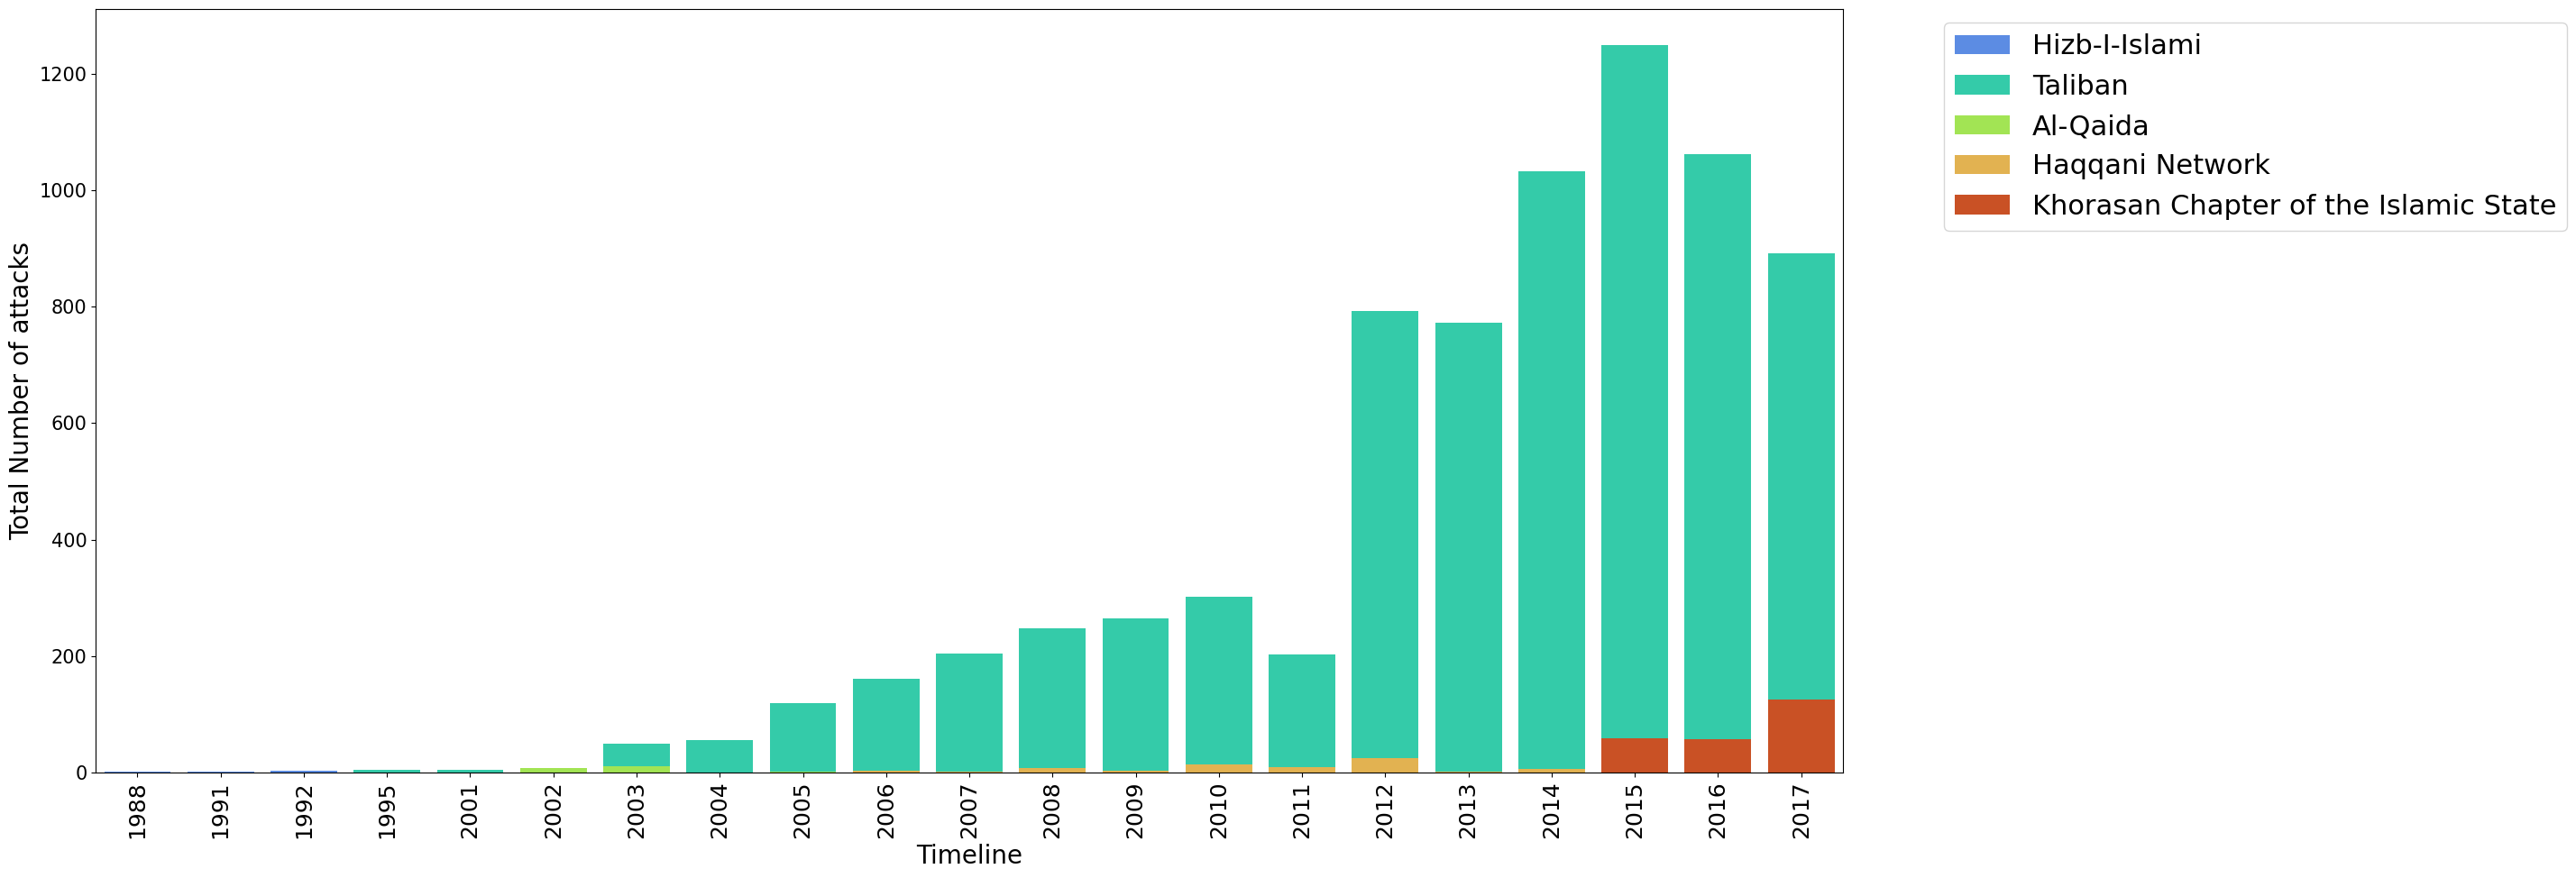

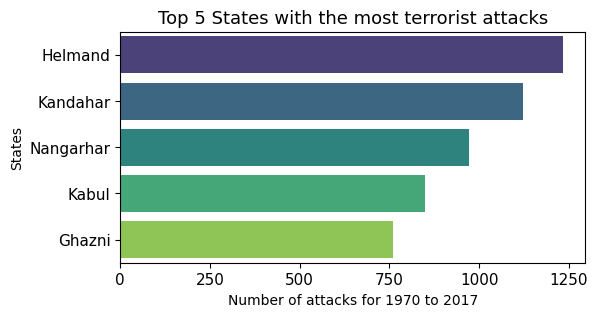

In [140]:
#Visualisation - 
#Barplot code - 
plt.figure(figsize = (25,11))
sns.barplot(data = overall2, x = 'Year',y ='Total_attacks', hue = 'Group_name', dodge = False, palette = 'turbo')
plt.legend(bbox_to_anchor = (1.05,1),fontsize =22)
plt.xticks(rotation = 90)
plt.yticks(fontsize = 15)
plt.ylabel('Total Number of attacks', fontsize = 20)
plt.xlabel('Timeline',fontsize =20)
plt.show()

#Barplot code - 

plt.figure(figsize = (6,3))
sns.barplot(data = afghan_states, x = 'Atacks', y = 'State', palette = 'viridis')

plt.title('Top 5 States with the most terrorist attacks', fontsize = 13)
plt.xlabel('Number of attacks for 1970 to 2017')
plt.ylabel('States')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.show()

# Insights to be written

## 4.Terror distribution across the globe -

### 4.1.World Map showing distribution of Terror strikes : 

In [ ]:
#Code-
#Using Plotly Geo-Scatter plot - 
fig = px.scatter_geo(location_df,lat='latitude',lon='longitude',hover_name="Country",color="Region")
fig.update_geos(projection_type="orthographic")
fig.update_layout(title='World wide Terrorist Attacked Regions (1970-2017)',title_x=0.5)
fig.update_layout(height=350, margin={"r":0,"t":35,"l":0,"b":0})
fig.show()

### 4.2.Number of Terror Attacks in Different Countries from 1970-2014: 

In [ ]:
#Code - 
#Using Plotly Choropleth -

attacks_time_lapse = pd.DataFrame(gt_df.groupby(["Year" , "Country"])["Year"].count() , 
                                  columns = ["Year"]).rename(columns = {"Year" : "attacks"}).reset_index()

attacks_time_lapse_choropleth = px.choropleth(attacks_time_lapse , locations = "Country" , locationmode = "country names" , 
              color = "attacks" , animation_group = "attacks" , 
              animation_frame = "Year" , labels={"attacks" : "Number of Attacks"} ,
              title = "Number of Terror Attacks in Different Countries from 1970-2014")
attacks_time_lapse_choropleth.show()